In [1]:
!pip install librosa

Defaulting to user installation because normal site-packages is not writeable


In [9]:
import librosa,librosa.display
import matplotlib.pyplot as plt
print(5)

5


In [3]:
import glob

# Get all files with a .wav extension
files = glob.glob("./archive (4)/fold*/**/*.wav", recursive=True)

# Select the first 5 files
selected_files = files[:5]

print("Selected files:", selected_files)

Selected files: ['./archive (4)\\fold1\\101415-3-0-2.wav', './archive (4)\\fold1\\101415-3-0-3.wav', './archive (4)\\fold1\\101415-3-0-8.wav', './archive (4)\\fold1\\102106-3-0-0.wav', './archive (4)\\fold1\\102305-6-0-0.wav']


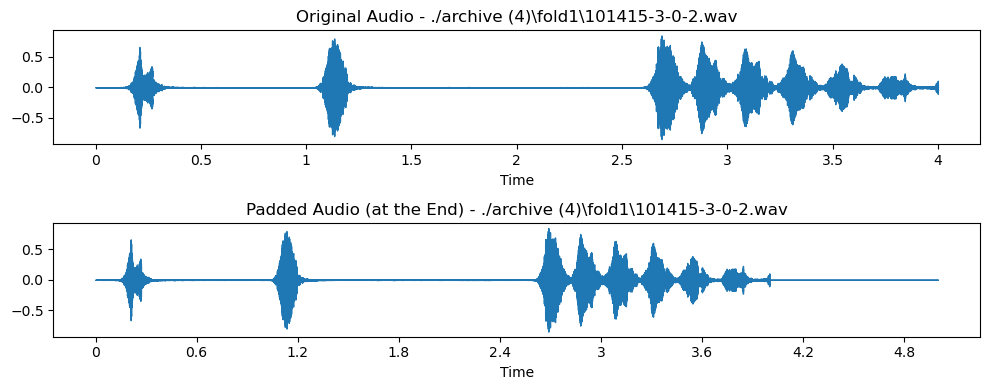

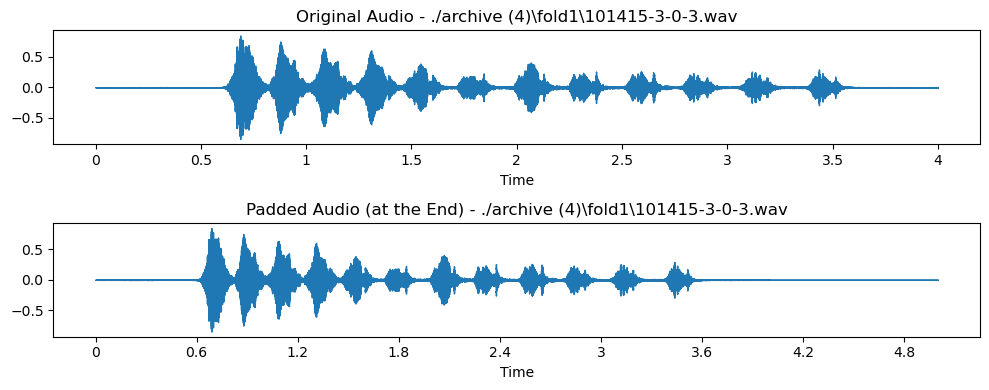

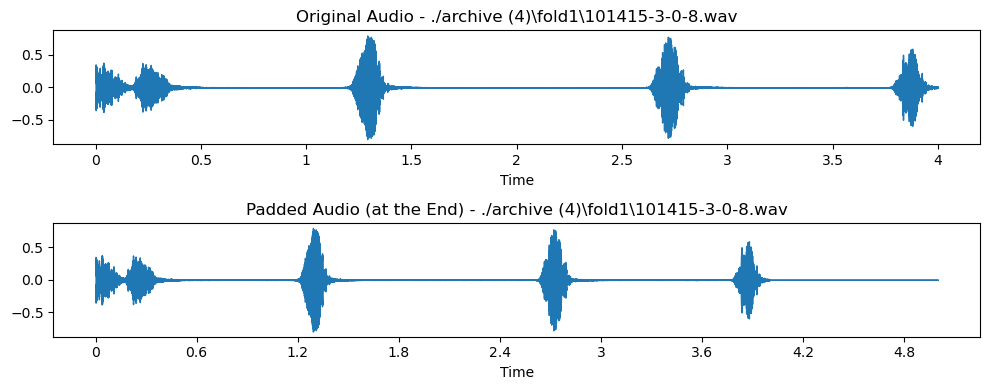

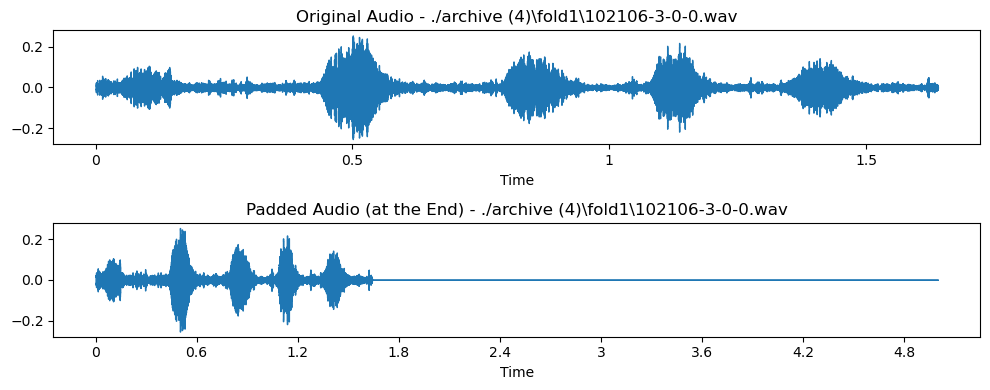

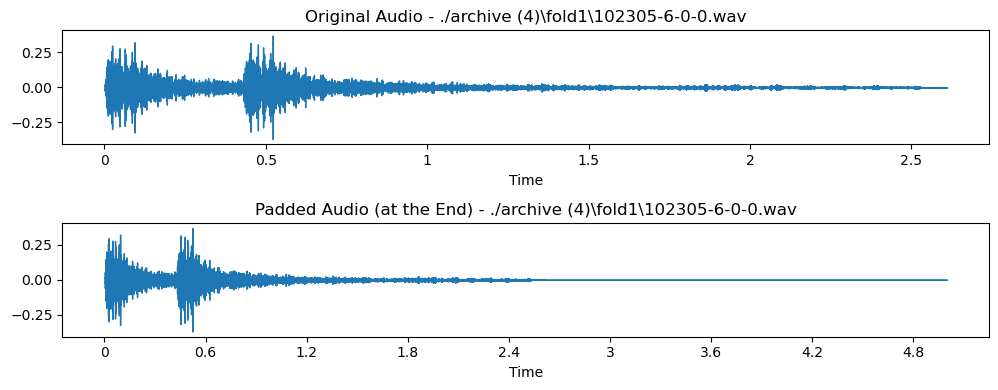

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# List of audio files
audio_files = glob.glob("./archive (4)/fold*/**/*.wav", recursive=True)

# Select the first 5 audio files
audio_files = audio_files[:5]

# Function to pad the audio signal at the end
def zero_padding(audio_signal, target_length):
    padding_length = target_length - len(audio_signal)
    if padding_length > 0:
        padded_audio = np.pad(audio_signal, (0, padding_length), mode='constant')
    else:
        padded_audio = audio_signal[:target_length]  # If the signal is already long enough
    return padded_audio

# Define the target length (e.g., 5 seconds worth of samples at 22050 Hz sample rate)
target_length = 22050 * 5  # Target length for 5 seconds

# Loop through the files
for audio_file in audio_files:
    # Load the audio file
    audio_data, sr = librosa.load(audio_file)

    # Apply zero padding
    padded_audio = zero_padding(audio_data, target_length)

    # Plot the original and padded signals for each file
    plt.figure(figsize=(10, 4))

    # Plot original audio
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(f'Original Audio - {audio_file}')

    # Plot padded audio
    plt.subplot(2, 1, 2)
    librosa.display.waveshow(padded_audio, sr=sr)
    plt.title(f'Padded Audio (at the End) - {audio_file}')

    plt.tight_layout()
    plt.show()


Saved padded audio to: ./archive (4)\padded_audio\padded_101415-3-0-2.wav


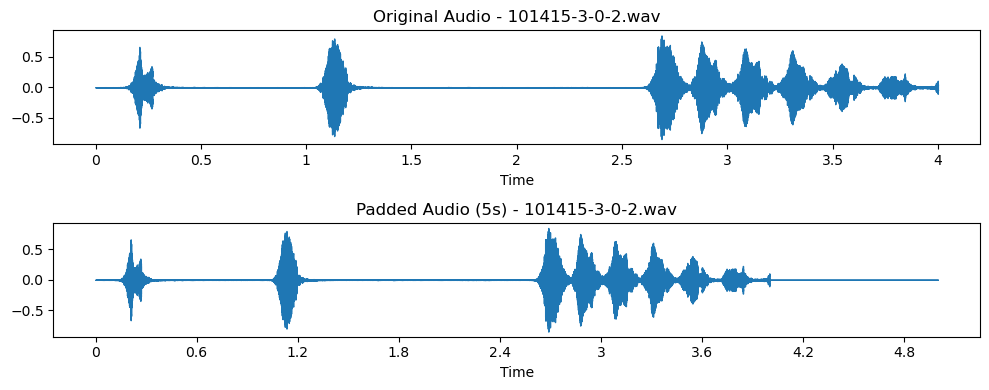

Saved padded audio to: ./archive (4)\padded_audio\padded_101415-3-0-3.wav


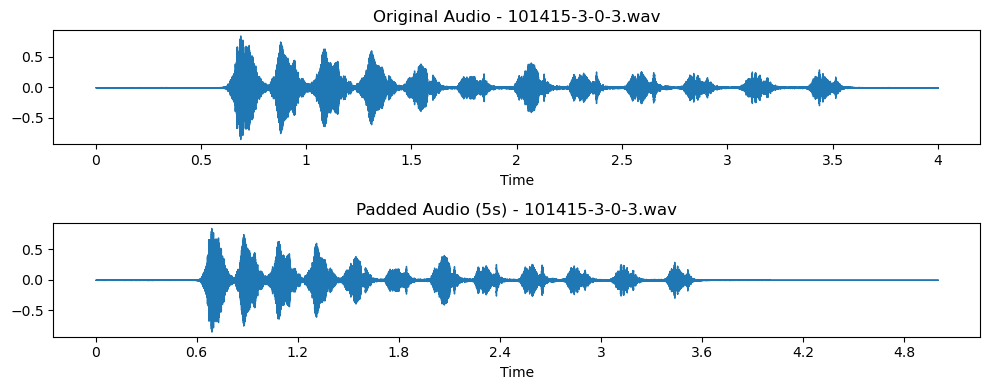

Saved padded audio to: ./archive (4)\padded_audio\padded_101415-3-0-8.wav


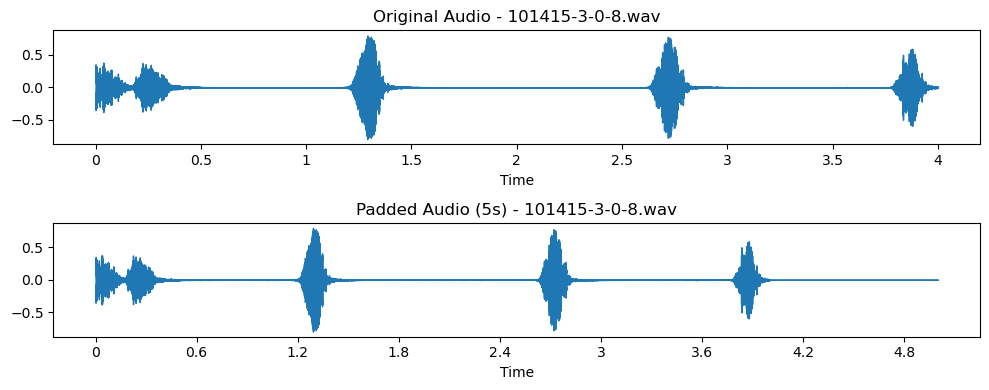

Saved padded audio to: ./archive (4)\padded_audio\padded_102106-3-0-0.wav


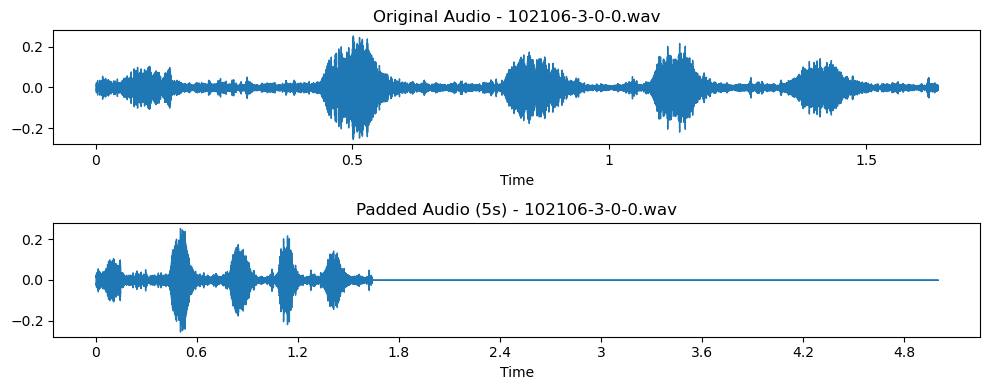

Saved padded audio to: ./archive (4)\padded_audio\padded_102305-6-0-0.wav


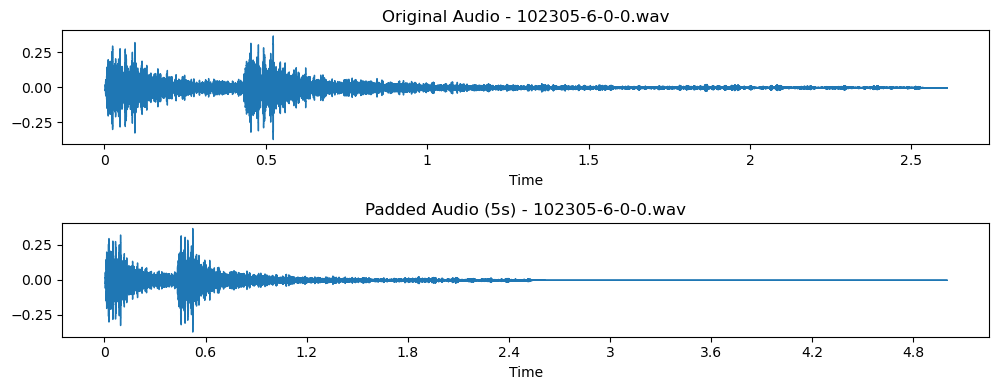

C:\Users\hp\OneDrive\Desktop\codes\minor_project\archive (4)\padded_audio\padded_101415-3-0-2.wav

C:\Users\hp\OneDrive\Desktop\codes\minor_project\archive (4)\padded_audio\padded_101415-3-0-3.wav

C:\Users\hp\OneDrive\Desktop\codes\minor_project\archive (4)\padded_audio\padded_101415-3-0-8.wav

C:\Users\hp\OneDrive\Desktop\codes\minor_project\archive (4)\padded_audio\padded_102106-3-0-0.wav

C:\Users\hp\OneDrive\Desktop\codes\minor_project\archive (4)\padded_audio\padded_102305-6-0-0.wav

In [8]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os
import glob
from IPython.display import FileLink, display


# Define paths
base_dir = "./archive (4)"
padded_audio_dir = os.path.join(base_dir, "padded_audio")

# Create a directory for padded files if it doesn't exist
if not os.path.exists(padded_audio_dir):
    os.makedirs(padded_audio_dir)

# Get list of audio files
audio_files = glob.glob(os.path.join(base_dir, "fold*/**/*.wav"), recursive=True)

# Select the first 5 audio files
audio_files = audio_files[:5]

# Function to pad the audio signal at the end
def zero_padding(audio_signal, target_length):
    padding_length = target_length - len(audio_signal)
    if padding_length > 0:
        padded_audio = np.pad(audio_signal, (0, padding_length), mode='constant')
    else:
        padded_audio = audio_signal[:target_length]  # If already long enough
    return padded_audio

# Define the target length (5 seconds of audio at 22050 Hz sample rate)
target_length = 22050 * 5  # 5 seconds

# Process each audio file
for audio_file in audio_files:
    try:
        # Load the audio file
        audio_data, sr = librosa.load(audio_file, sr=22050)

        # Apply zero padding
        padded_audio = zero_padding(audio_data, target_length)

        # Extract filename (without folder structure)
        audio_filename = os.path.basename(audio_file)  # e.g., "12345.wav"
        padded_file = os.path.join(padded_audio_dir, f"padded_{audio_filename}")

        # Save the padded audio
        sf.write(padded_file, padded_audio, sr)
        print(f"Saved padded audio to: {padded_file}")

        # Plot the original and padded signals
        plt.figure(figsize=(10, 4))

        # Plot original audio
        plt.subplot(2, 1, 1)
        librosa.display.waveshow(audio_data, sr=sr)
        plt.title(f'Original Audio - {audio_filename}')

        # Plot padded audio
        plt.subplot(2, 1, 2)
        librosa.display.waveshow(padded_audio, sr=sr)
        plt.title(f'Padded Audio (5s) - {audio_filename}')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error processing {audio_file}: {e}")

# Download the processed files
for audio_file in audio_files:
    audio_filename = os.path.basename(audio_file)
    padded_file = os.path.join(padded_audio_dir, f"padded_{audio_filename}")

    if os.path.exists(padded_file):
        display(FileLink(padded_file))  # Create a download link
    else:
        print(f"Skipping download, file not found: {padded_file}")


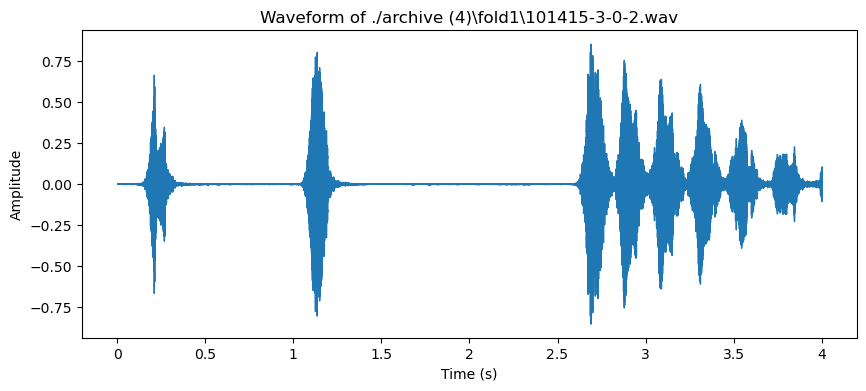

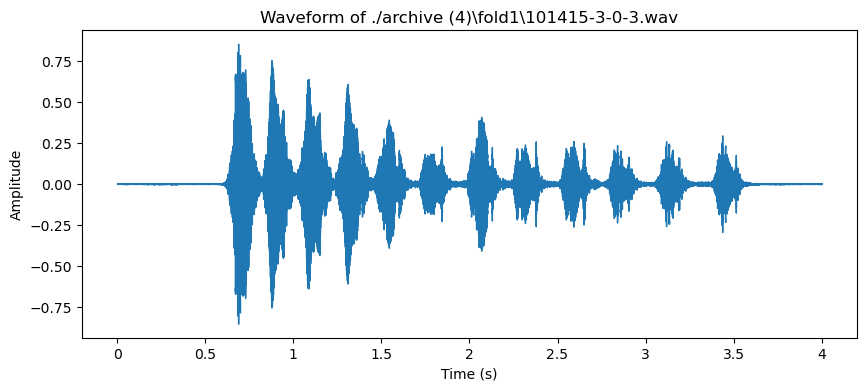

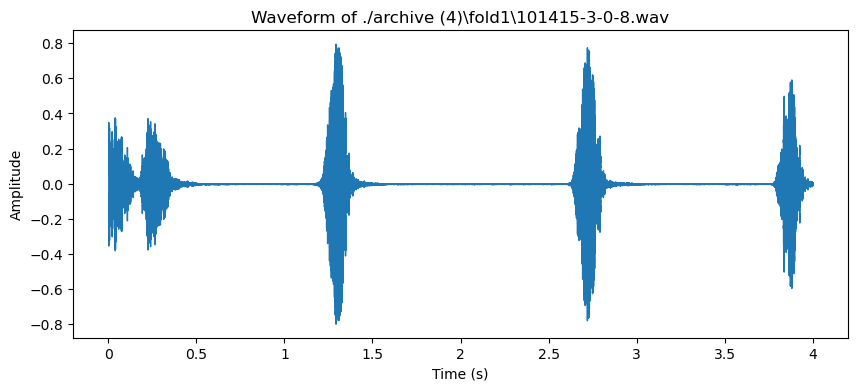

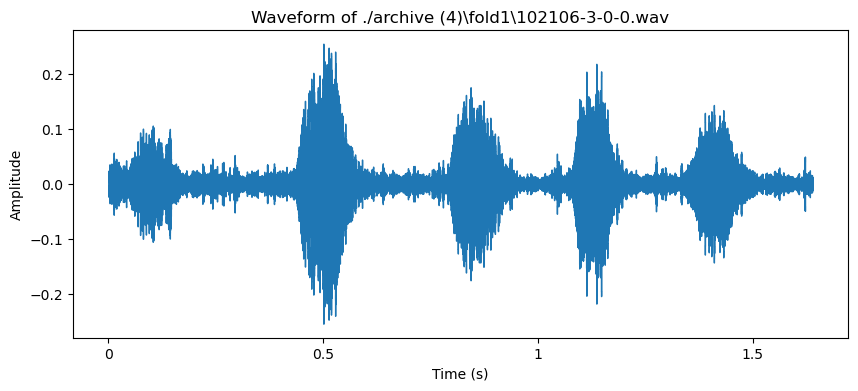

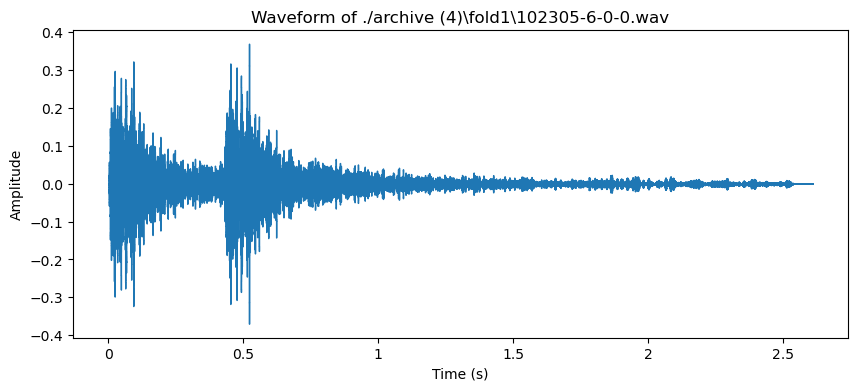

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
audio_dir = "./archive (4)"
audio_files = glob.glob(os.path.join(audio_dir, "fold*/**/*.wav"), recursive=True)

# Select the first 5 audio files
files = audio_files[:5]

# Plot the waveform for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Display the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(signal, sr=sr)
    plt.title(f"Waveform of {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()


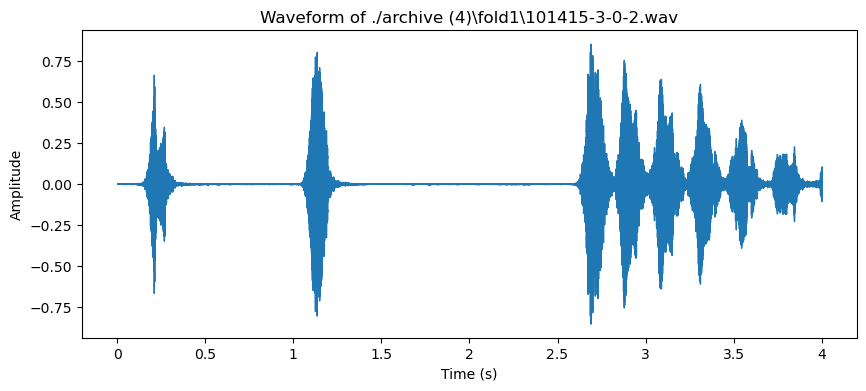

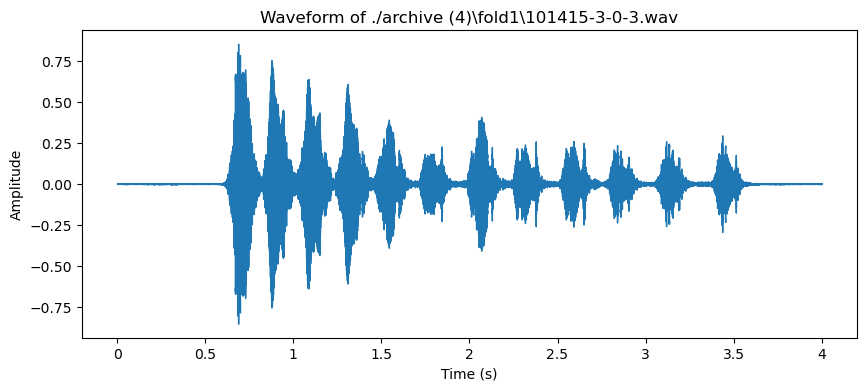

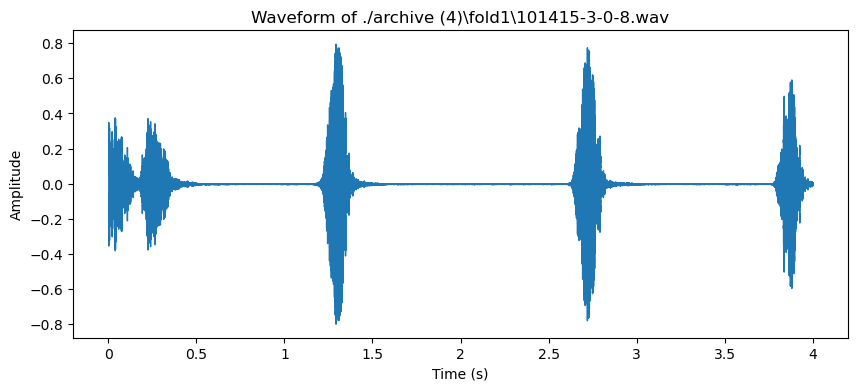

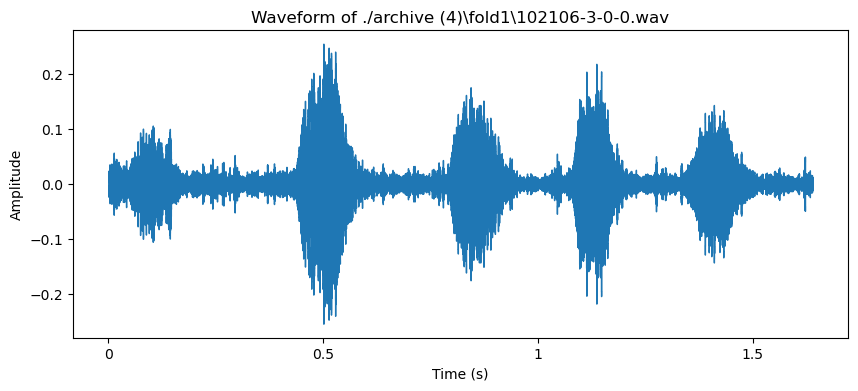

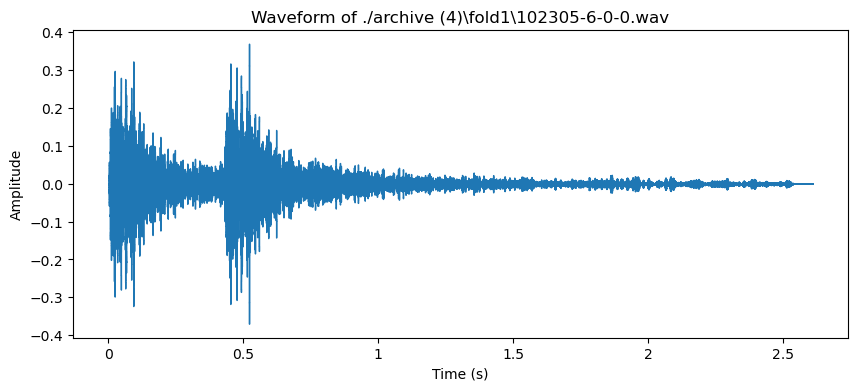

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = audio_files[:5]

# Plot the waveform for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Display the waveform
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(signal, sr=sr)
    plt.title(f"Waveform of {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

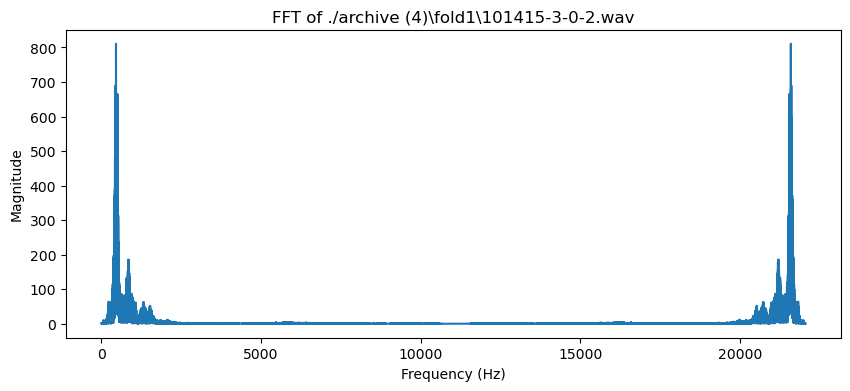

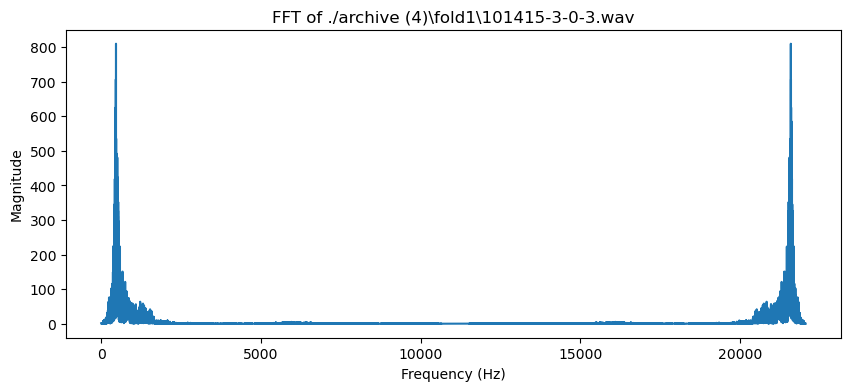

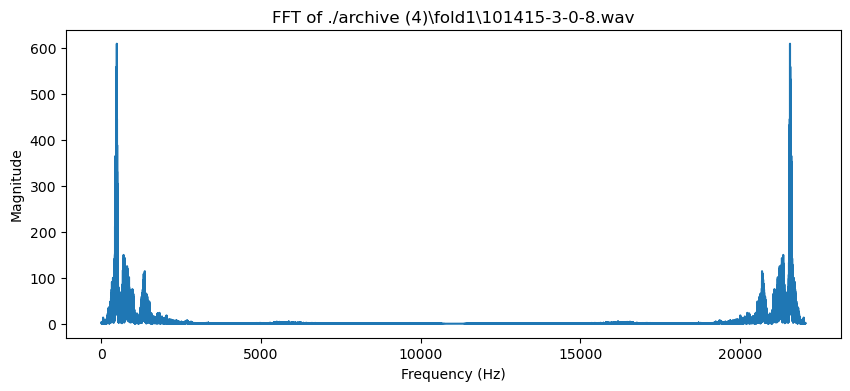

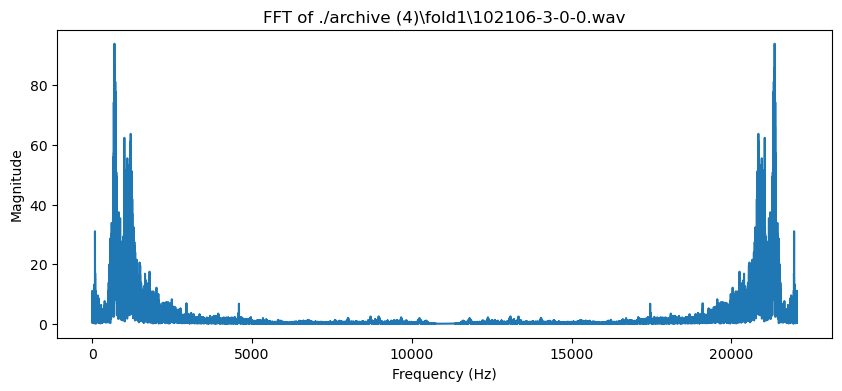

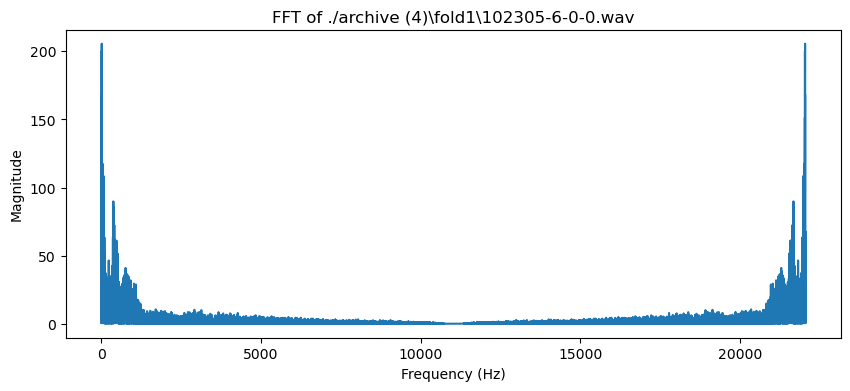

In [12]:
# Plot the FFT for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform FFT
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    # Display the FFT plot
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, magnitude)
    plt.title(f"FFT of {file}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()


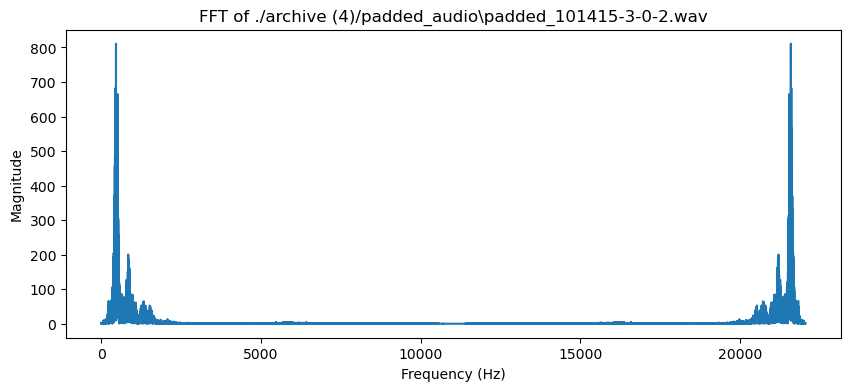

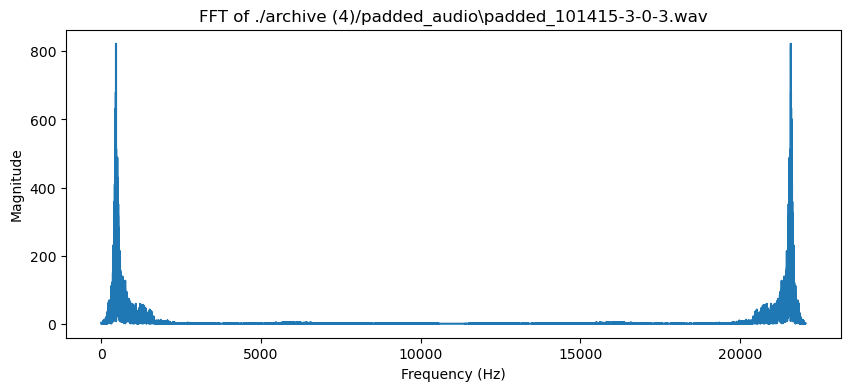

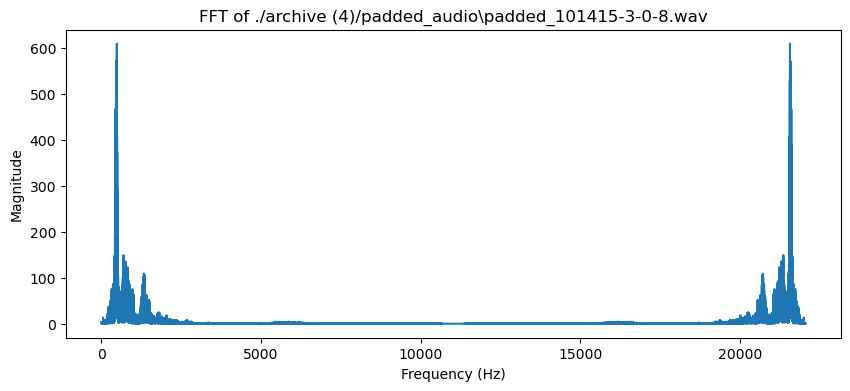

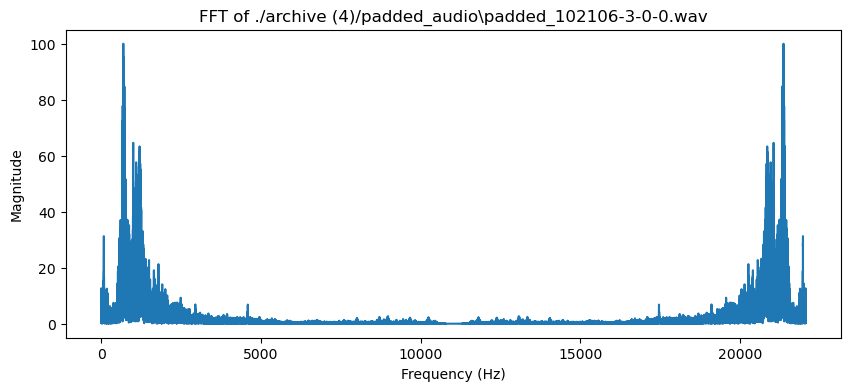

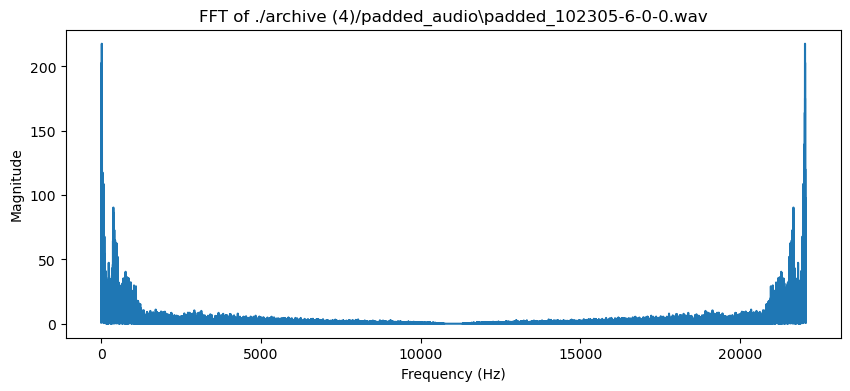

In [13]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
padded_audio_dir = "./archive (4)/padded_audio"

# Use glob to find the first 5 padded audio files
files = glob.glob(os.path.join(padded_audio_dir, "padded_*.wav"))[:5]

# Plot the FFT for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform FFT
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    # Display the FFT plot
    plt.figure(figsize=(10, 4))
    plt.plot(frequency, magnitude)
    plt.title(f"FFT of {file}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

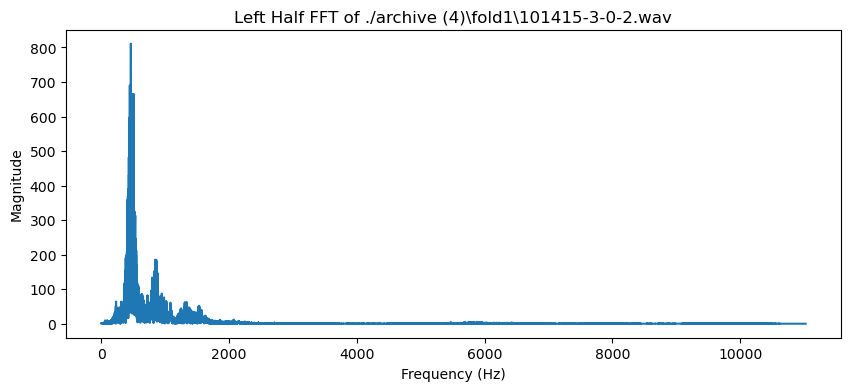

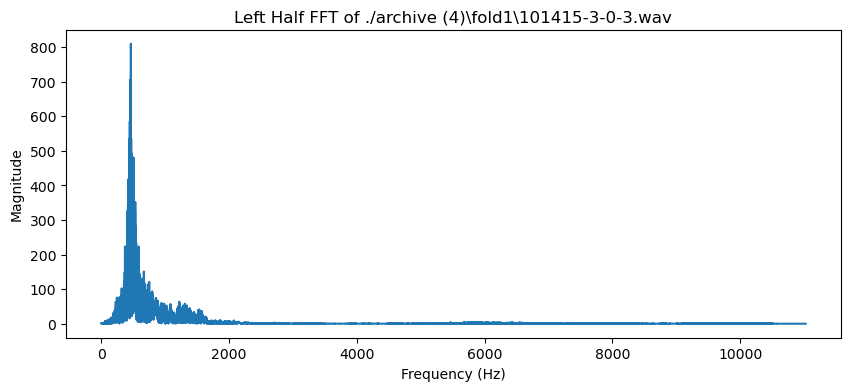

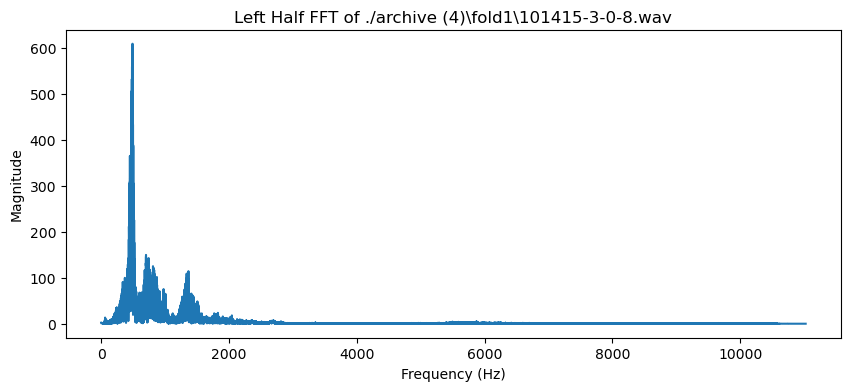

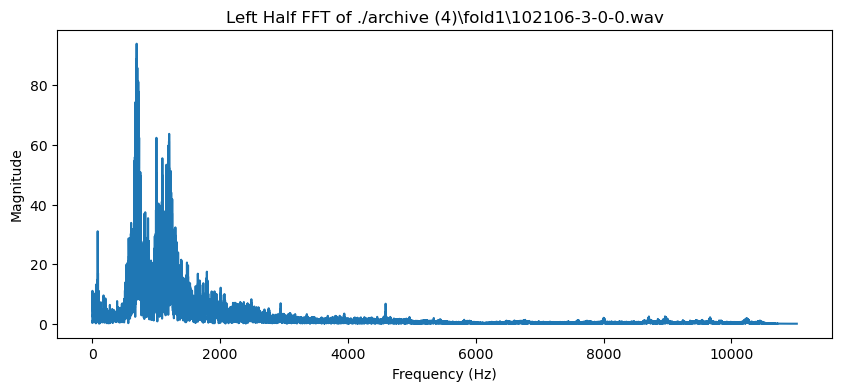

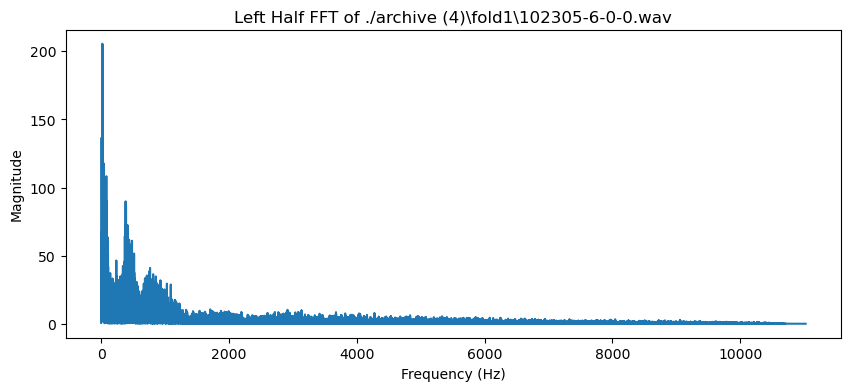

In [14]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = audio_files[:5]

# Plot the left half of the FFT for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform FFT
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    # Only take the left half of the spectrum (positive frequencies)
    left_frequency = frequency[:len(frequency) // 2]
    left_magnitude = magnitude[:len(magnitude) // 2]

    # Display the plot for the left half of the FFT
    plt.figure(figsize=(10, 4))
    plt.plot(left_frequency, left_magnitude)
    plt.title(f"Left Half FFT of {file}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()


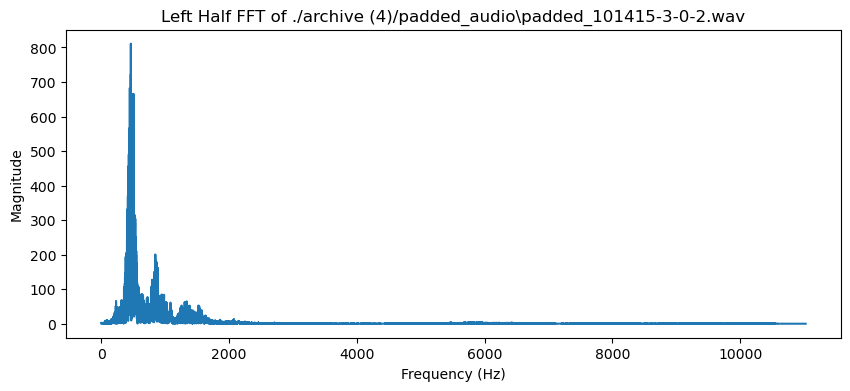

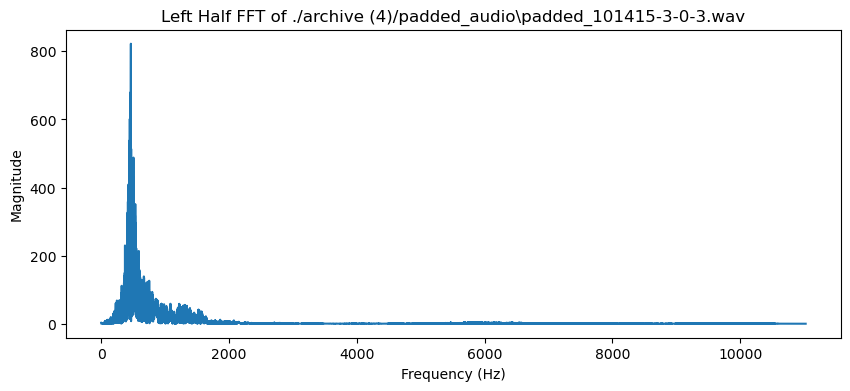

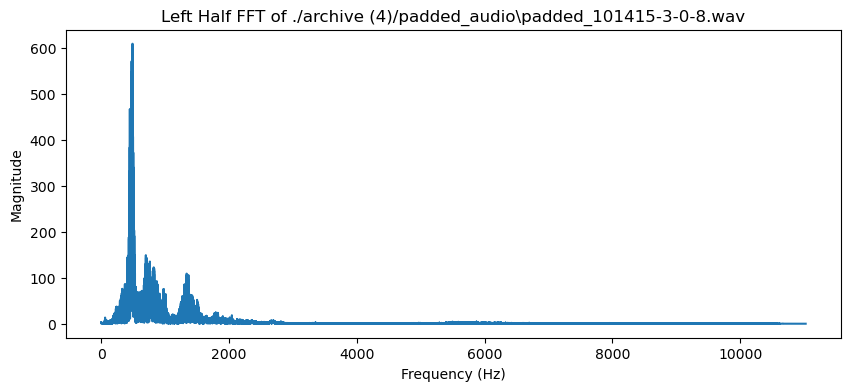

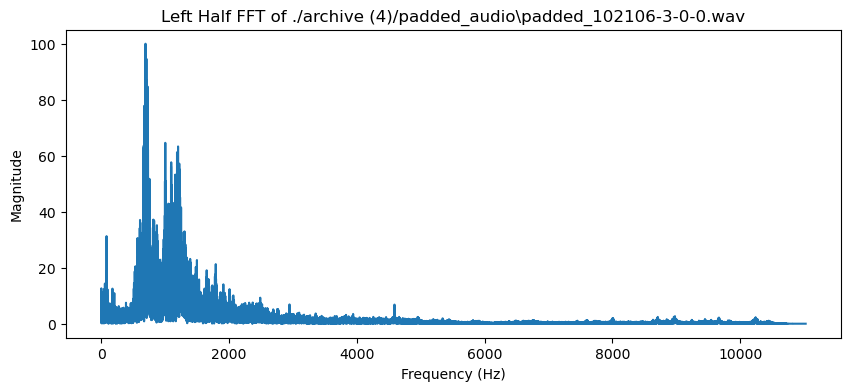

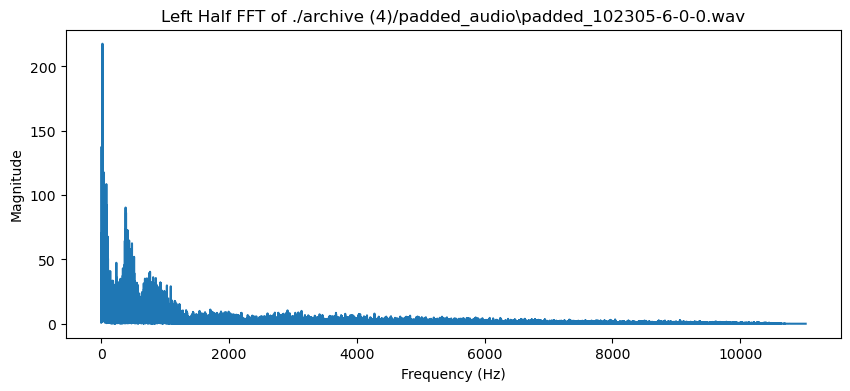

In [15]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob(os.path.join(padded_audio_dir, "padded_*.wav"))[:5]

# Plot the left half of the FFT for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform FFT
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft)
    frequency = np.linspace(0, sr, len(magnitude))

    # Only take the left half of the spectrum (positive frequencies)
    left_frequency = frequency[:len(frequency) // 2]
    left_magnitude = magnitude[:len(magnitude) // 2]

    # Display the plot for the left half of the FFT
    plt.figure(figsize=(10, 4))
    plt.plot(left_frequency, left_magnitude)
    plt.title(f"Left Half FFT of {file}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.show()


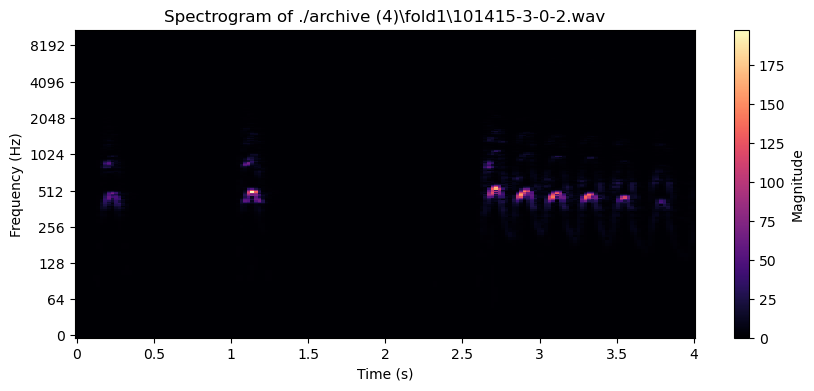

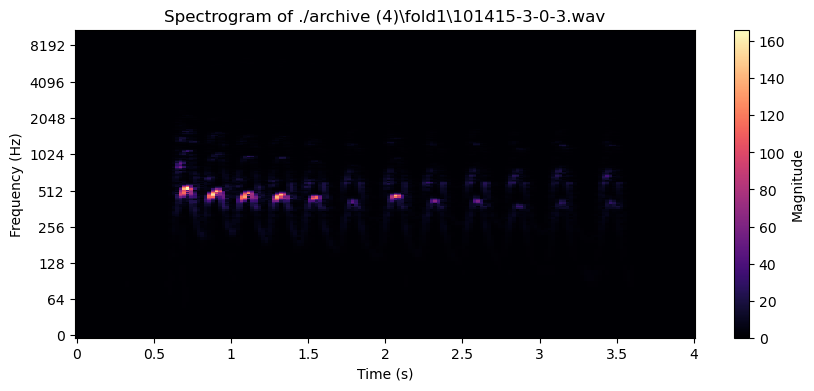

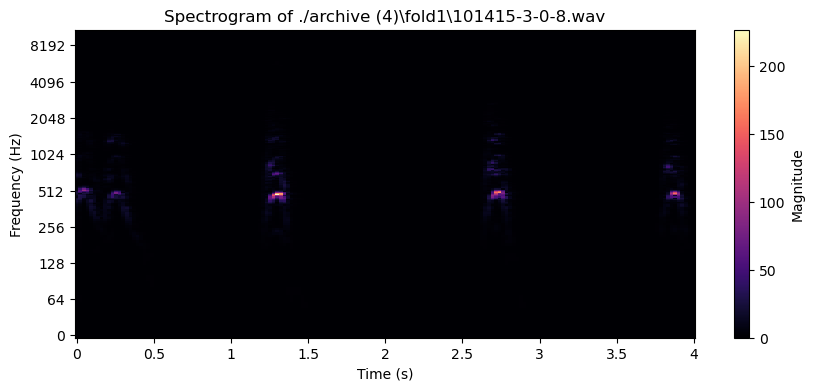

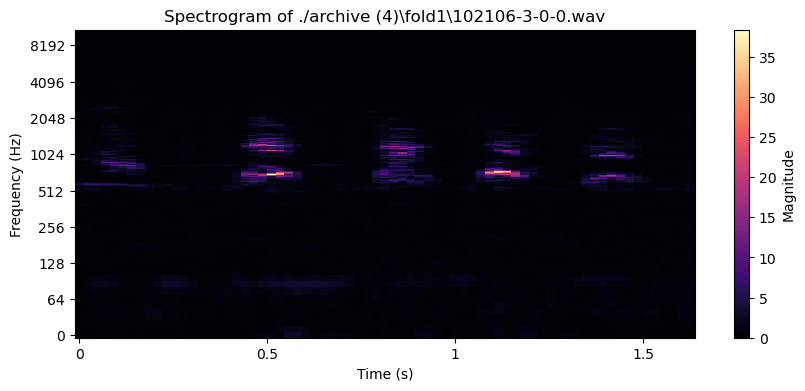

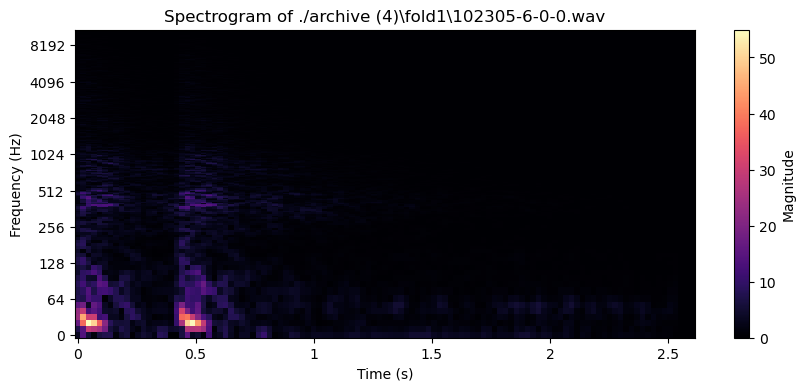

In [16]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = audio_files[:5]

# Parameters for STFT
n_fft = 2048  # Number of samples in each FFT window
hop_length = 512  # Number of samples between successive frames

# Plot the spectrogram for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform STFT
    stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)  # Take the magnitude to get the power spectrogram

    # Display the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log")
    plt.title(f"Spectrogram of {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Magnitude")
    plt.show()




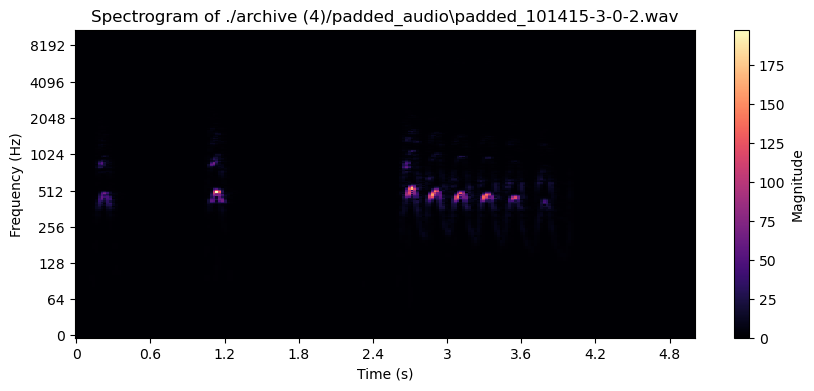

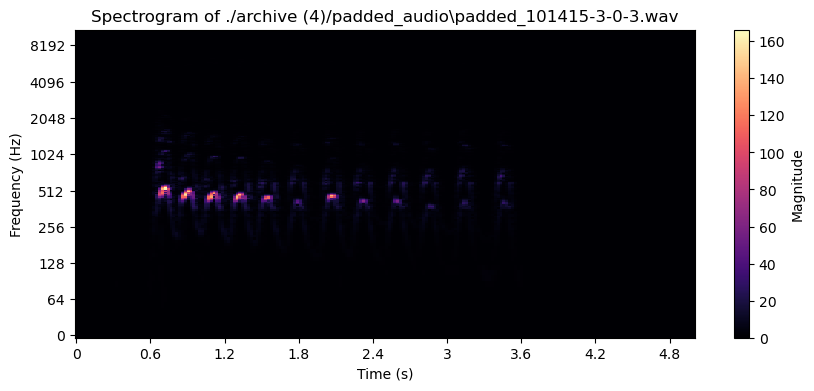

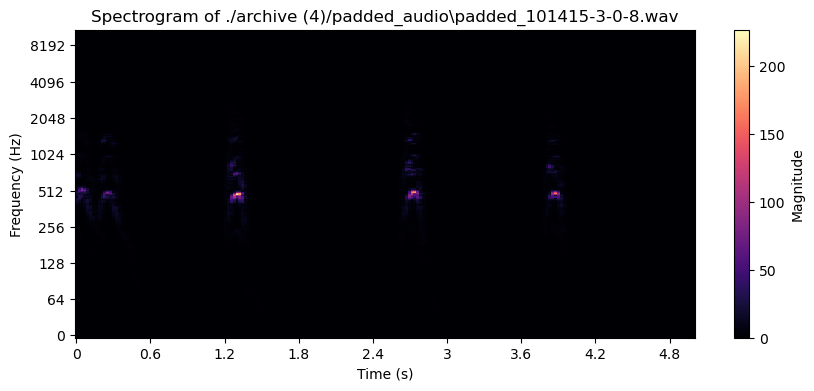

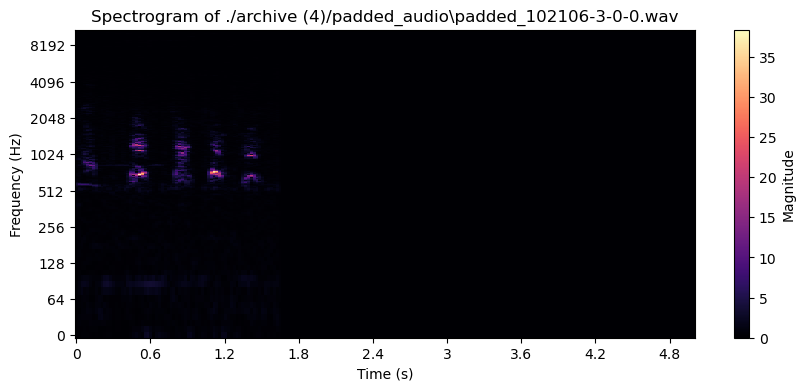

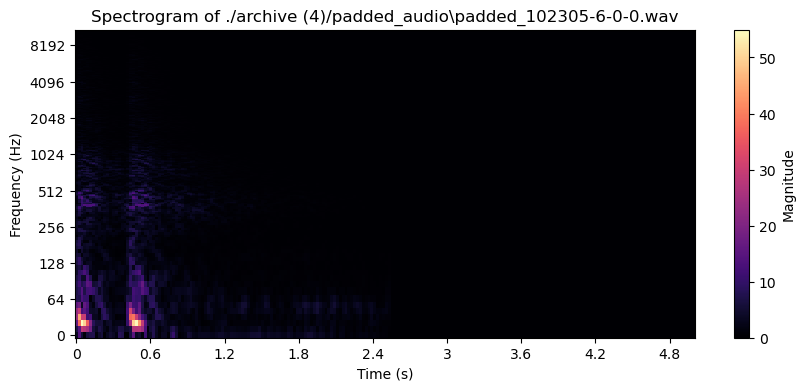

In [17]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob(os.path.join(padded_audio_dir, "padded_*.wav"))[:5]

# Parameters for STFT
n_fft = 2048  # Number of samples in each FFT window
hop_length = 512  # Number of samples between successive frames

# Plot the spectrogram for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform STFT
    stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)  # Take the magnitude to get the power spectrogram

    # Display the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log")
    plt.title(f"Spectrogram of {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Magnitude")
    plt.show()

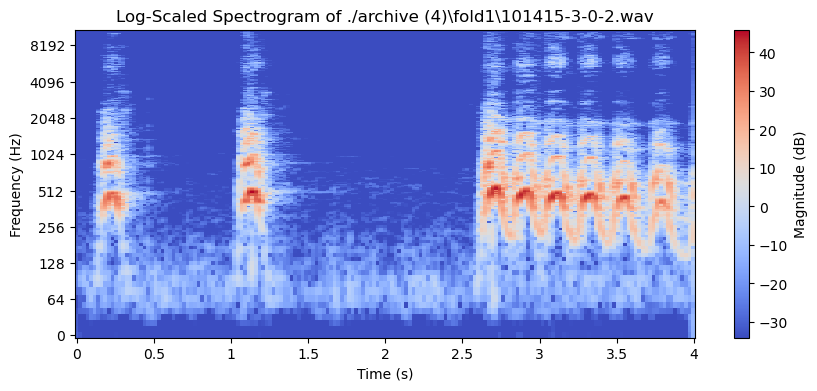

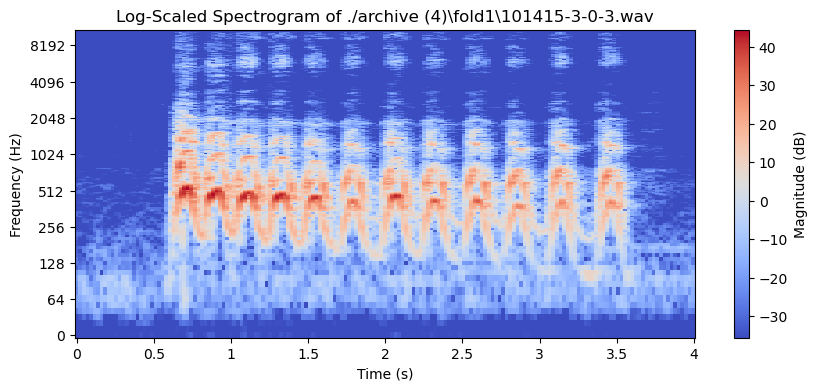

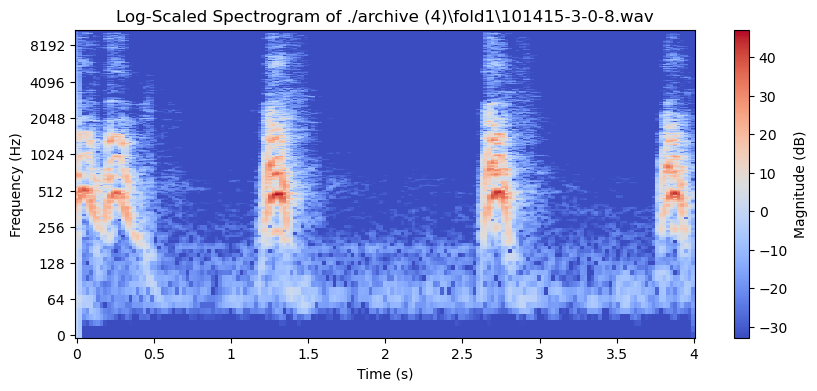

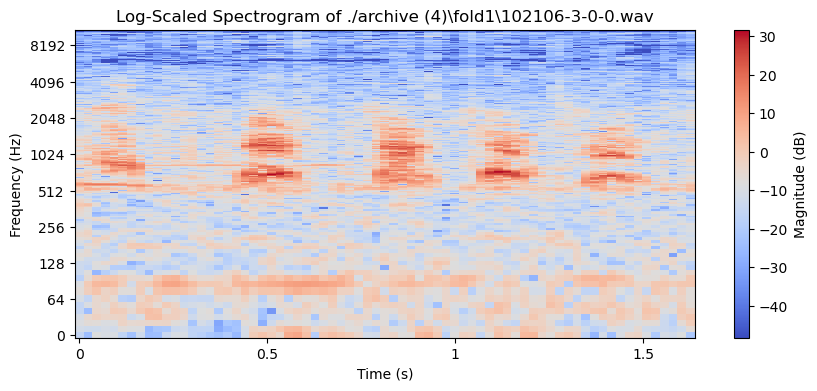

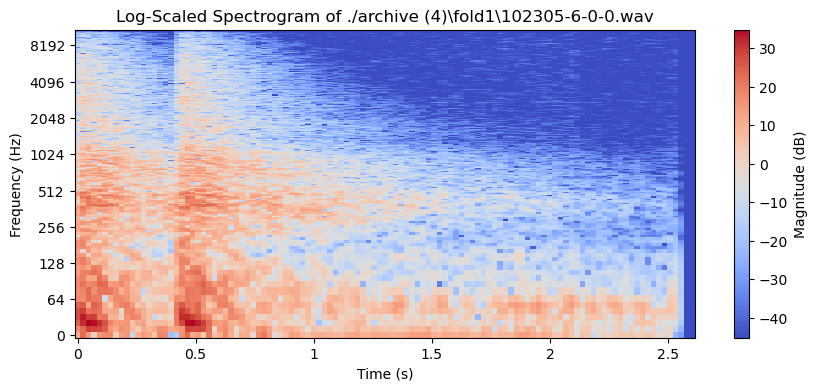

In [18]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = audio_files[:5]

# Parameters for STFT
n_fft = 2048  # Number of samples in each FFT window
hop_length = 512  # Number of samples between successive frames

# Plot the log spectrogram for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform STFT and convert to magnitude
    stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)

    # Convert the magnitude spectrogram to decibel (dB) scale
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    # Display the log spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log")
    plt.title(f"Log-Scaled Spectrogram of {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Magnitude (dB)")
    plt.show()


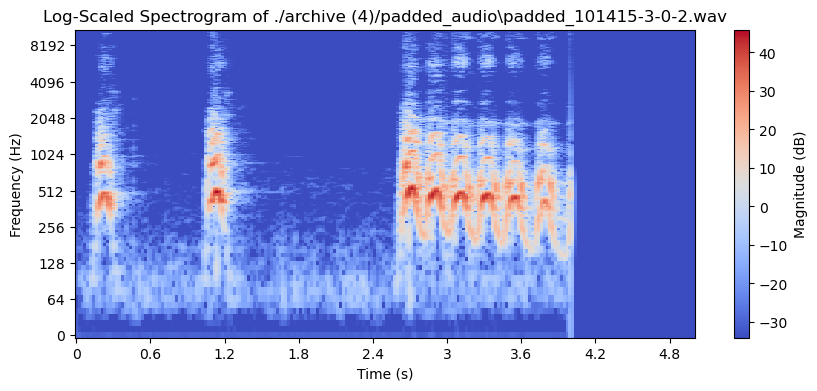

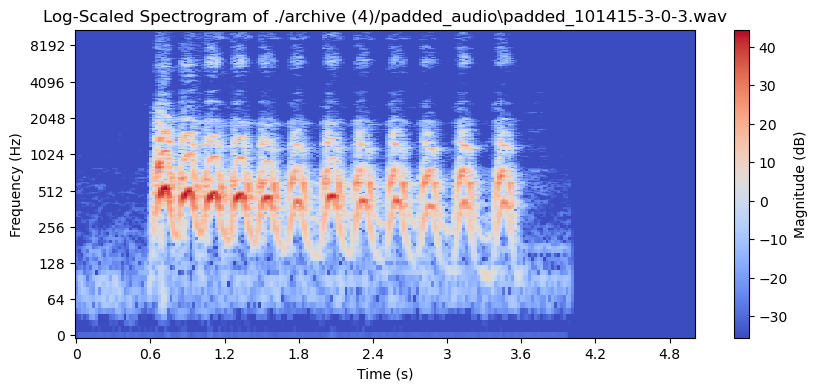

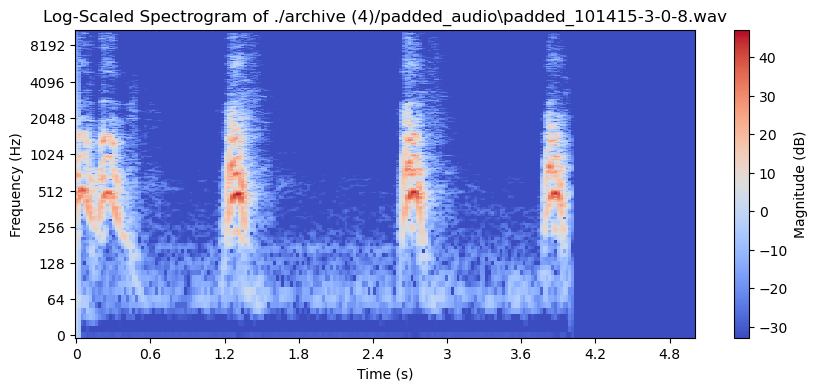

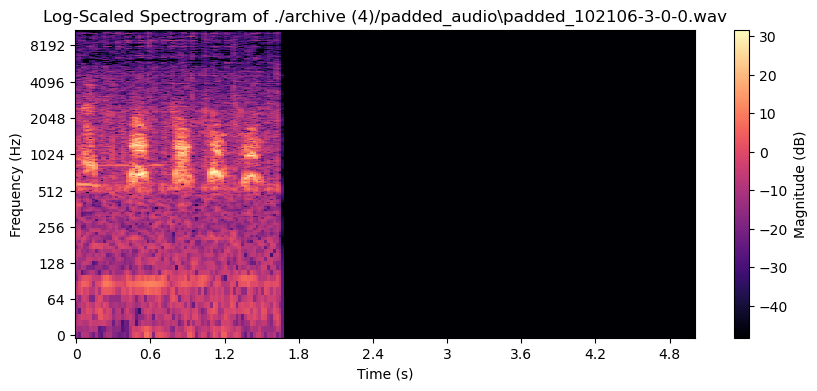

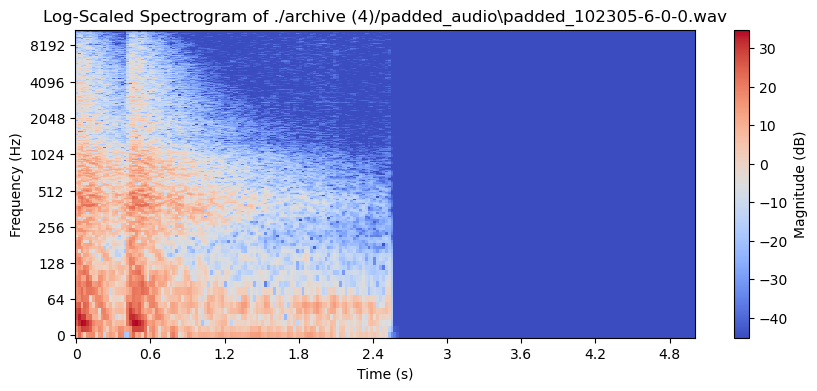

In [19]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import glob

# Get all .wav files and select the first 5
files = glob.glob(os.path.join(padded_audio_dir, "padded_*.wav"))[:5]

# Parameters for STFT
n_fft = 2048  # Number of samples in each FFT window
hop_length = 512  # Number of samples between successive frames

# Plot the log spectrogram for each file
for file in files:
    # Load the audio file
    signal, sr = librosa.load(file, sr=22050)  # Sample rate of 22050 Hz

    # Perform STFT and convert to magnitude
    stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
    spectrogram = np.abs(stft)

    # Convert the magnitude spectrogram to decibel (dB) scale
    log_spectrogram = librosa.amplitude_to_db(spectrogram)

    # Display the log spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log")
    plt.title(f"Log-Scaled Spectrogram of {file}")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.colorbar(label="Magnitude (dB)")
    plt.show()


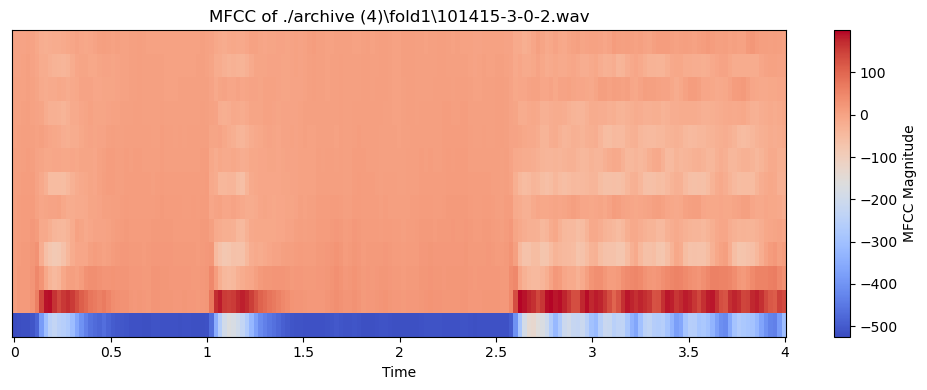

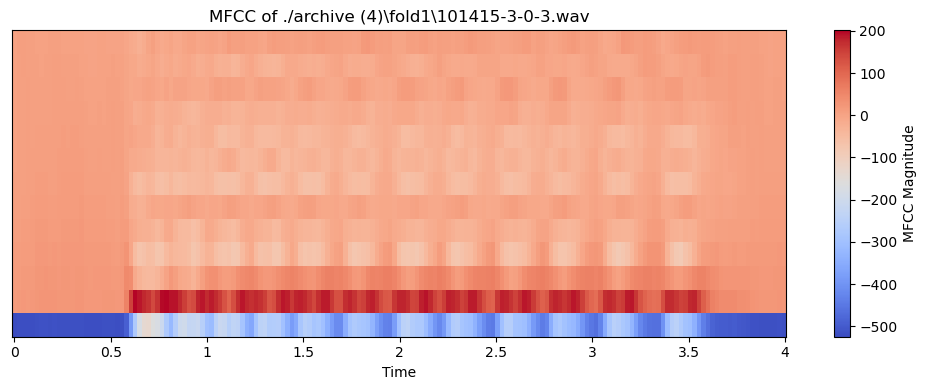

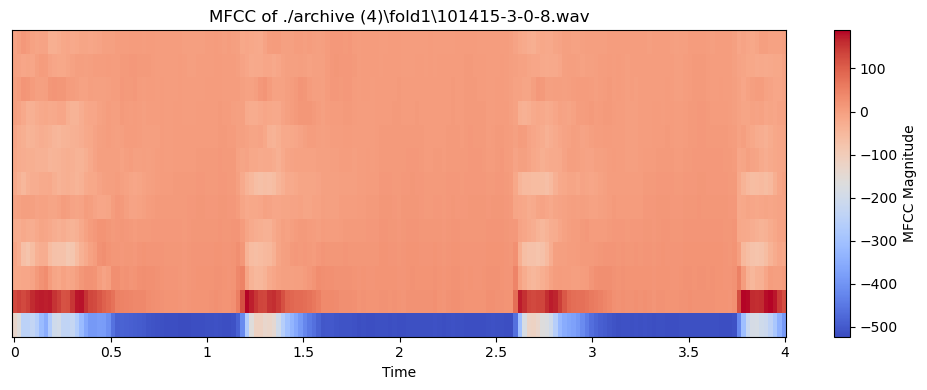

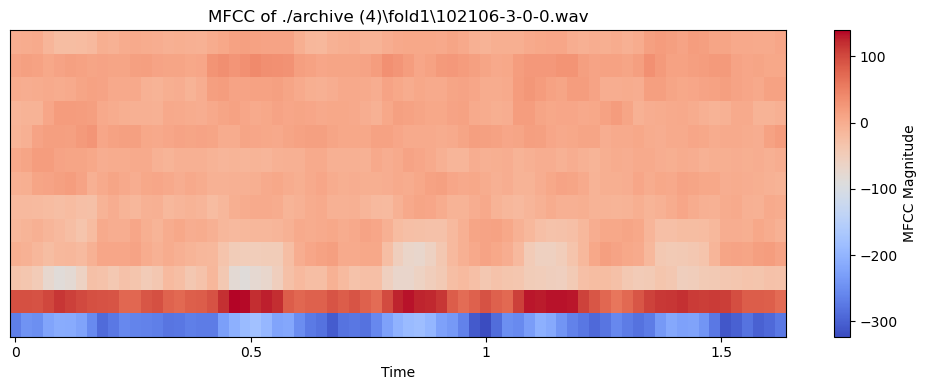

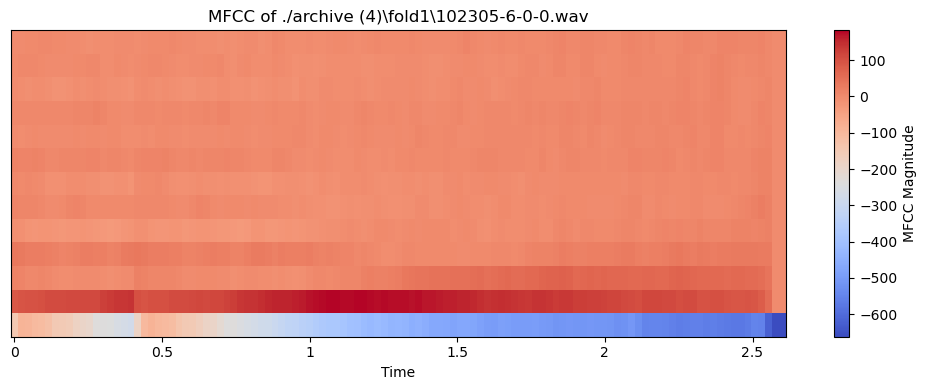

In [20]:
files = audio_files[:5]
for audio_file in files:
    data, sr = librosa.load(audio_file)

    # Calculate the MFCC
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)  # 13 is the typical number of MFCCs

    # Plot the MFCC
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar(label='MFCC Magnitude')
    plt.title(f'MFCC of {audio_file}')
    plt.tight_layout()
    plt.show()


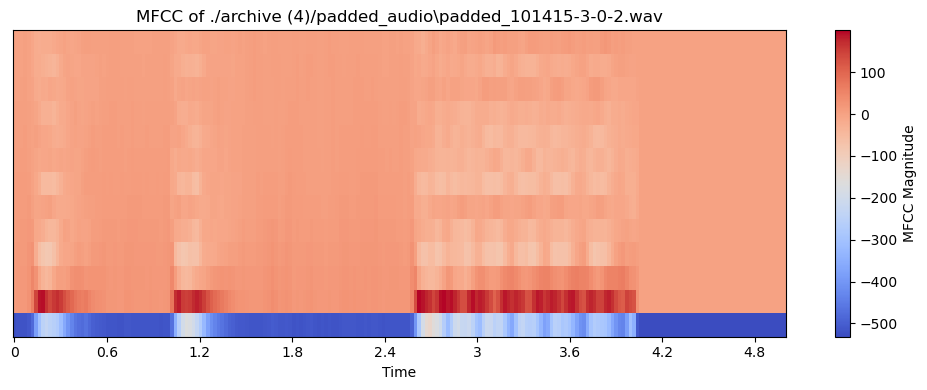

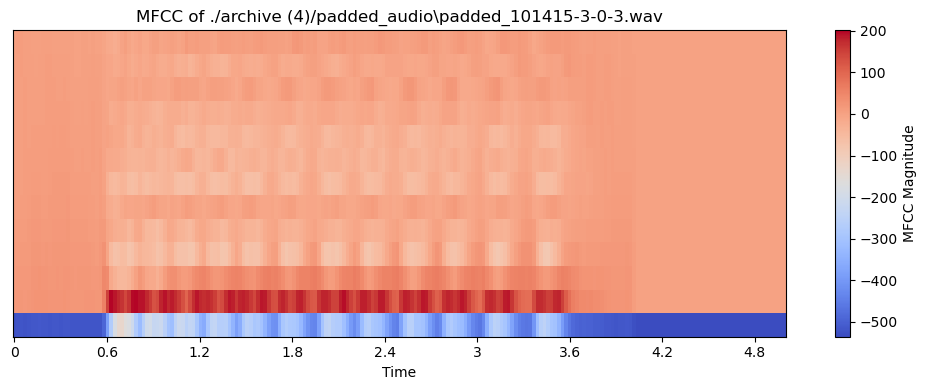

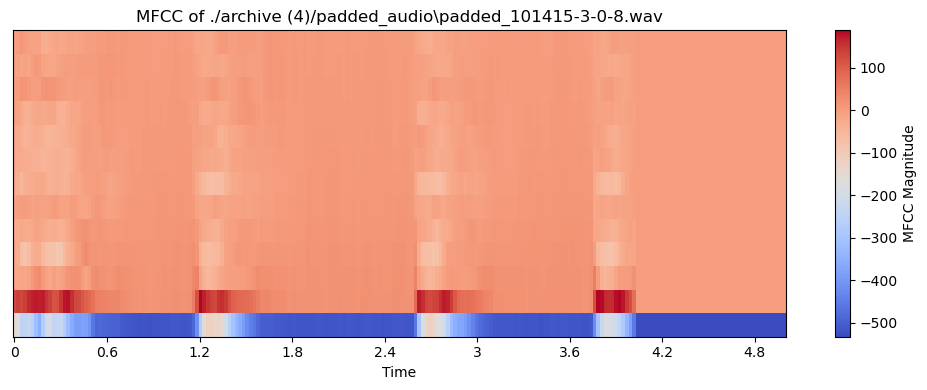

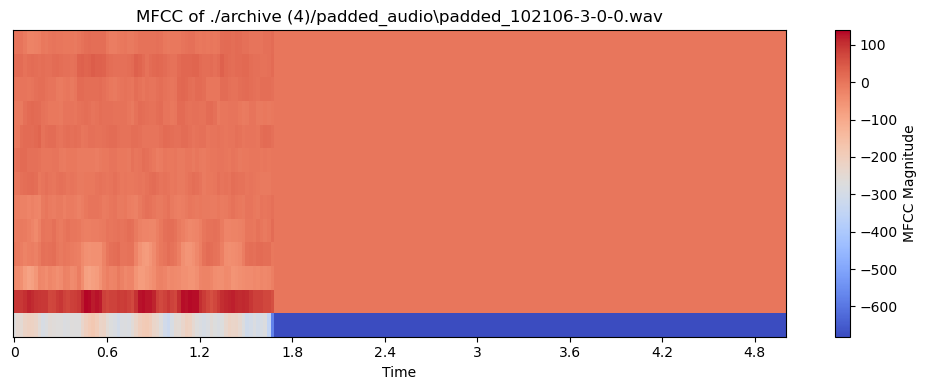

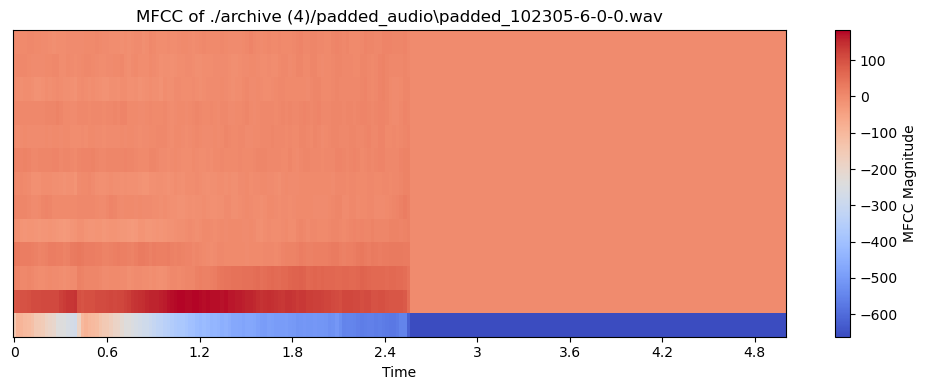

In [21]:
files = glob.glob(os.path.join(padded_audio_dir, "padded_*.wav"))[:5]
for audio_file in files:
    data, sr = librosa.load(audio_file)
    # Calculate the MFCC
    mfcc = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=13)  # 13 is the typical number of MFCCs

    # Plot the MFCC
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar(label='MFCC Magnitude')
    plt.title(f'MFCC of {audio_file}')
    plt.tight_layout()
    plt.show()


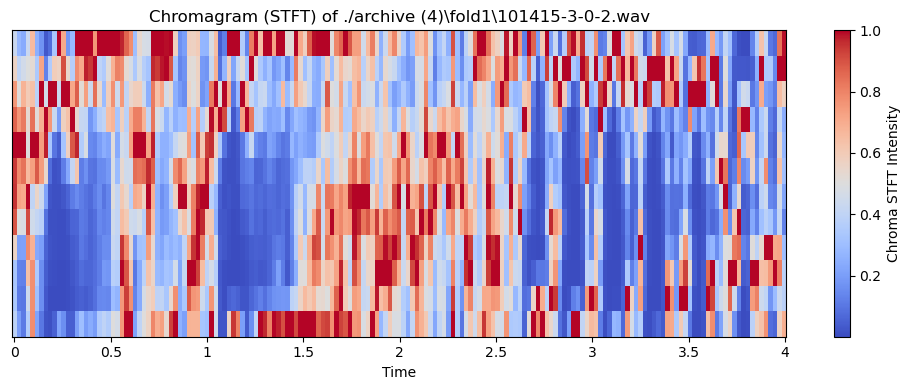

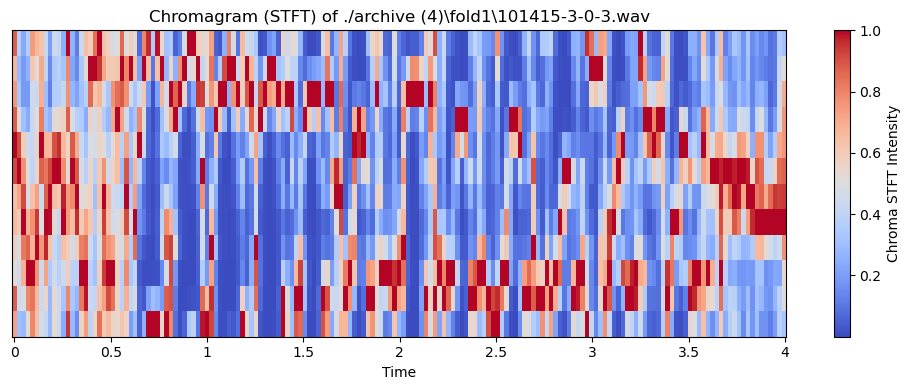

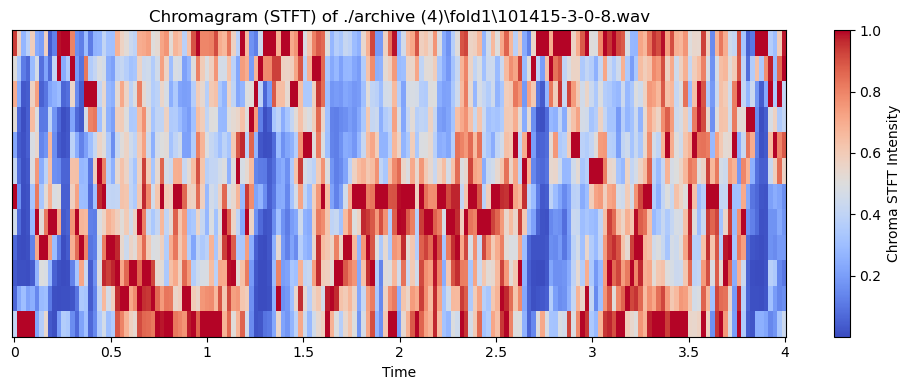

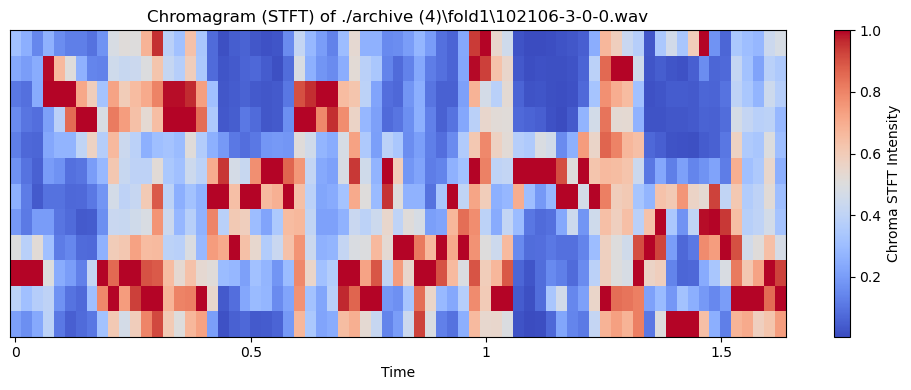

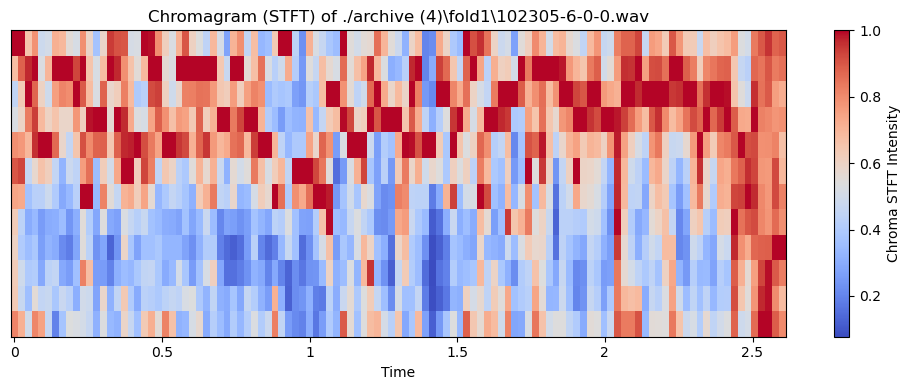

In [22]:
files = audio_files[:5]
for audio_file in files:
    data, sr = librosa.load(audio_file)

    # Calculate the Chromagram (STFT-based)
    chroma_stft = librosa.feature.chroma_stft(y=data, sr=sr)

    # Plot the Chromagram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma_stft, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar(label='Chroma STFT Intensity')
    plt.title(f'Chromagram (STFT) of {audio_file}')
    plt.tight_layout()
    plt.show()


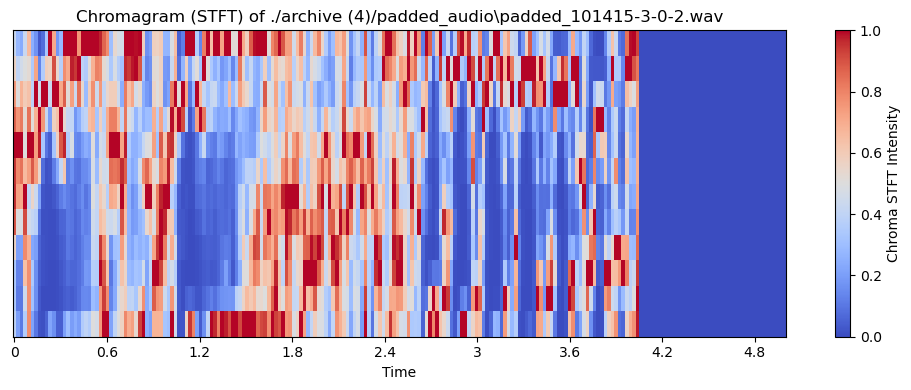

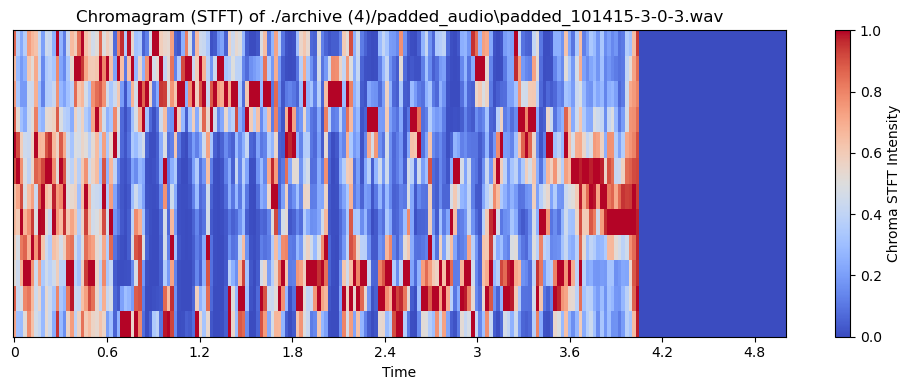

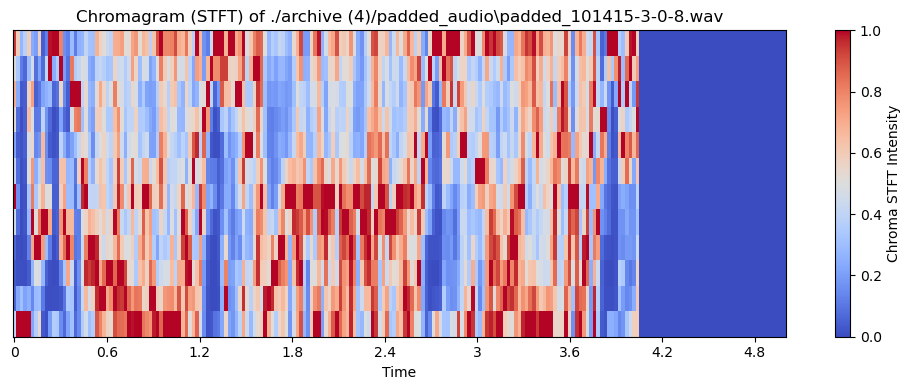

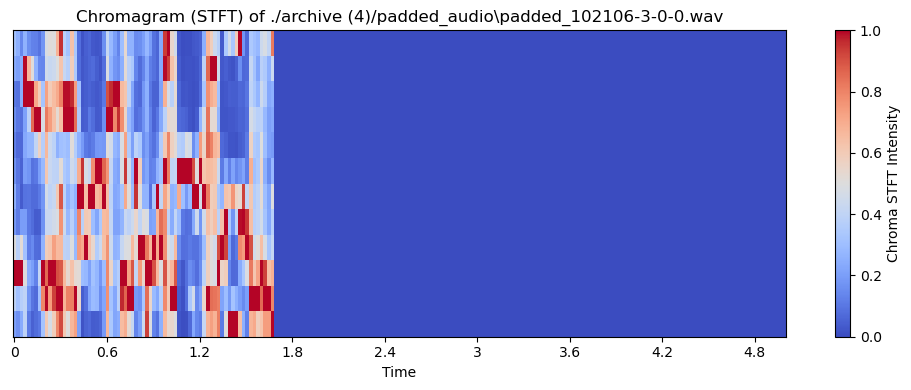

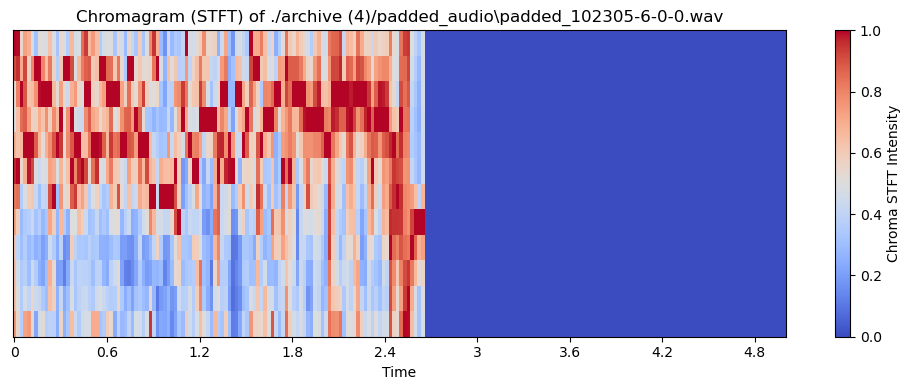

In [23]:
files = glob.glob(os.path.join(padded_audio_dir, "padded_*.wav"))[:5]
for audio_file in files:
    data, sr = librosa.load(audio_file)

    # Calculate the Chromagram (STFT-based)
    chroma_stft = librosa.feature.chroma_stft(y=data, sr=sr)

    # Plot the Chromagram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma_stft, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar(label='Chroma STFT Intensity')
    plt.title(f'Chromagram (STFT) of {audio_file}')
    plt.tight_layout()
    plt.show()

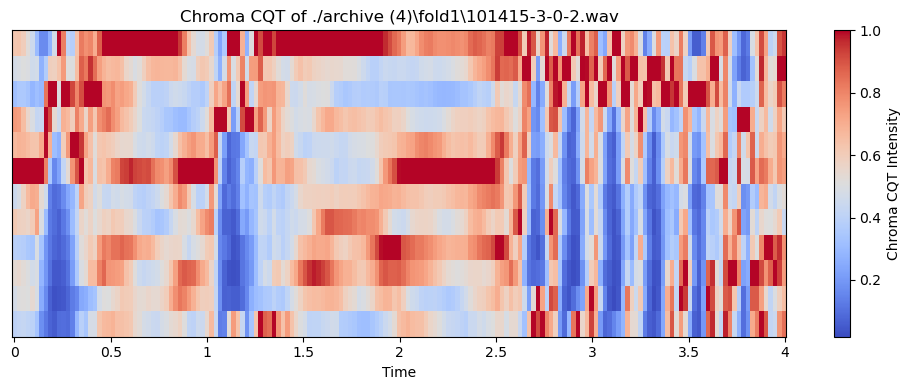

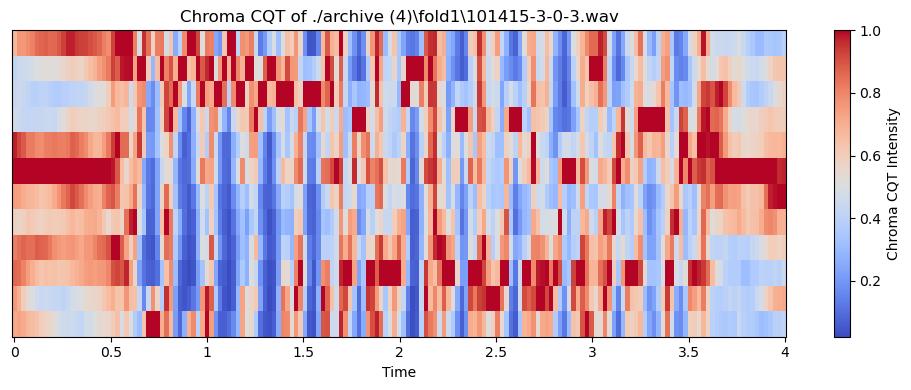

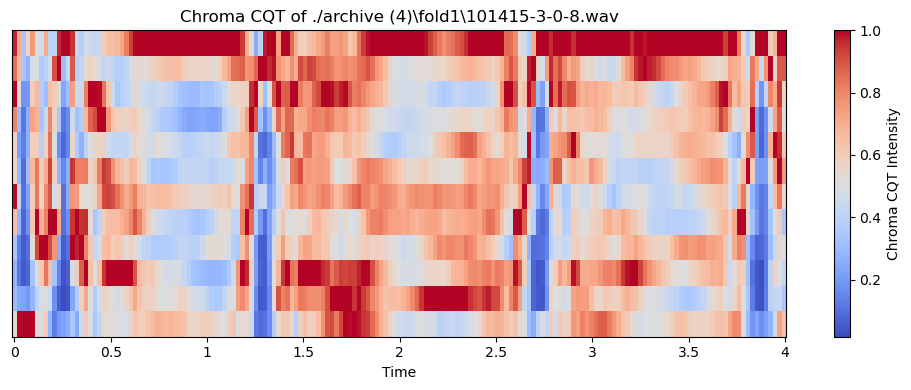

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=566
  warnings.warn(


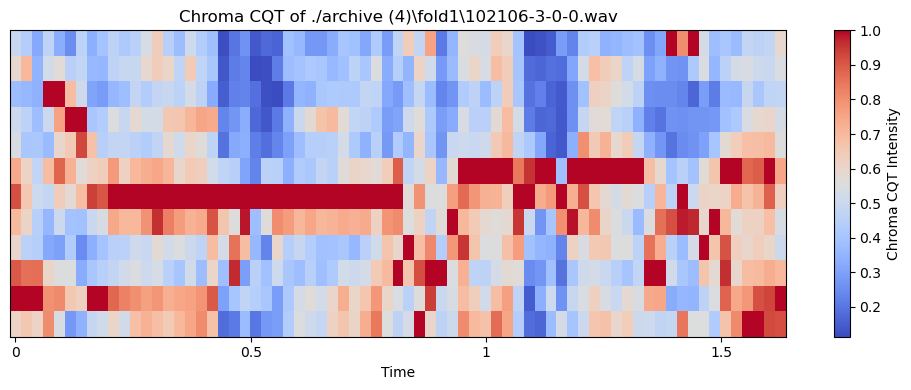

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=1024 is too large for input signal of length=900
  warnings.warn(


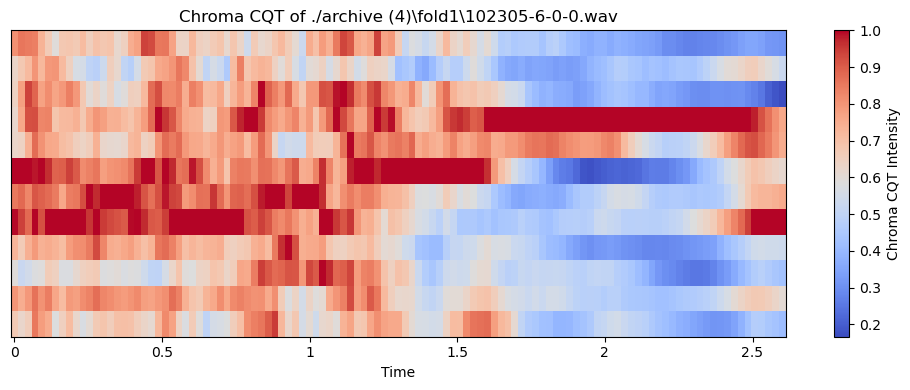

In [24]:
files = audio_files[:5]
for audio_file in files:
    data, sr = librosa.load(audio_file)

    # Compute Chroma CQT
    chroma_cqt = librosa.feature.chroma_cqt(y=data, sr=sr)

    # Plot Chroma CQT
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma_cqt, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar(label='Chroma CQT Intensity')
    plt.title(f'Chroma CQT of {audio_file}')
    plt.tight_layout()
    plt.show()

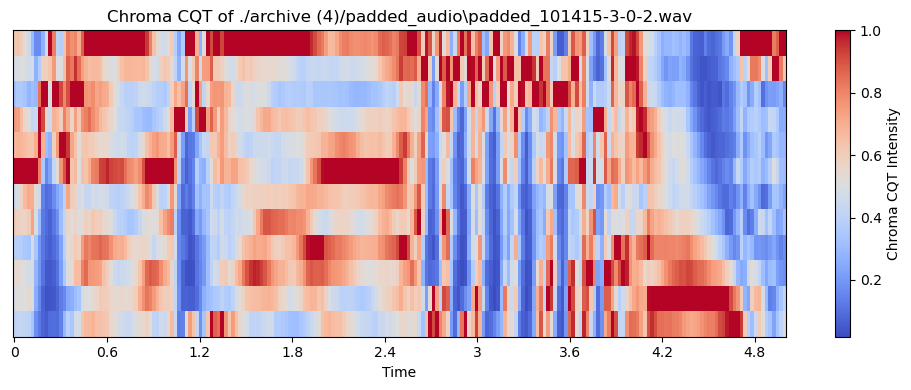

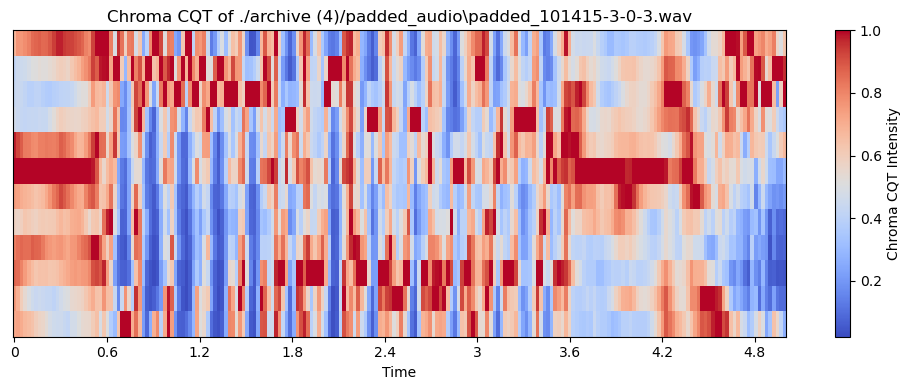

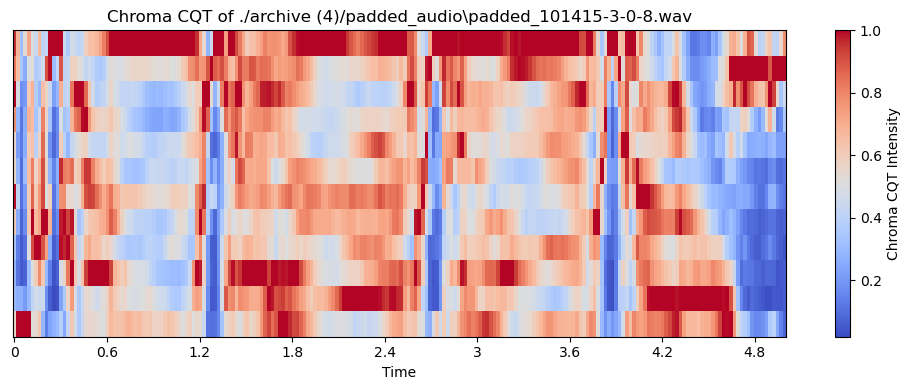

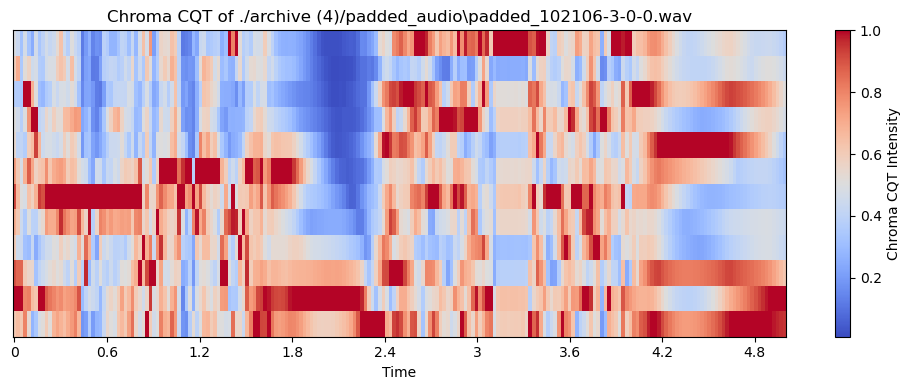

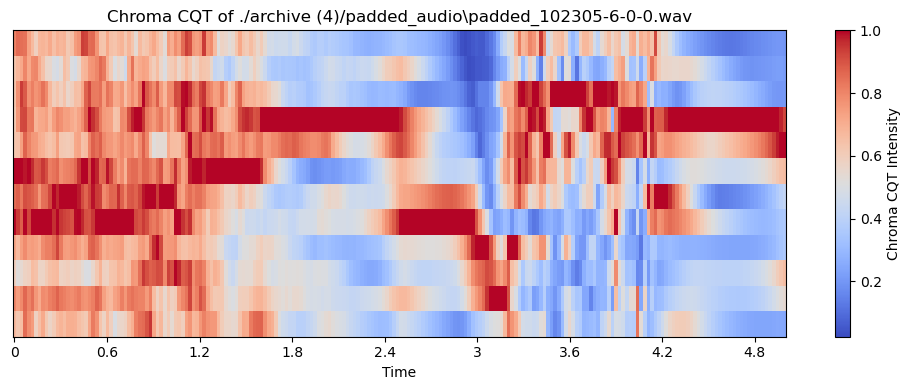

In [25]:
files = glob.glob(os.path.join(padded_audio_dir, "padded_*.wav"))[:5]
for audio_file in files:
    data, sr = librosa.load(audio_file)

    # Compute Chroma CQT
    chroma_cqt = librosa.feature.chroma_cqt(y=data, sr=sr)

    # Plot Chroma CQT
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma_cqt, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar(label='Chroma CQT Intensity')
    plt.title(f'Chroma CQT of {audio_file}')
    plt.tight_layout()
    plt.show()


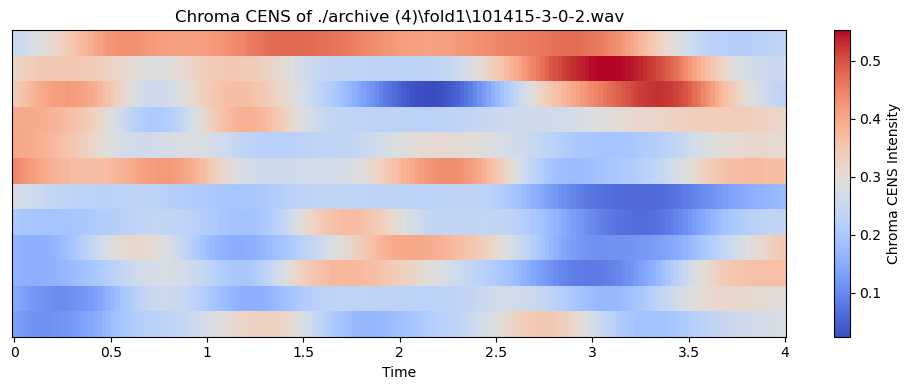

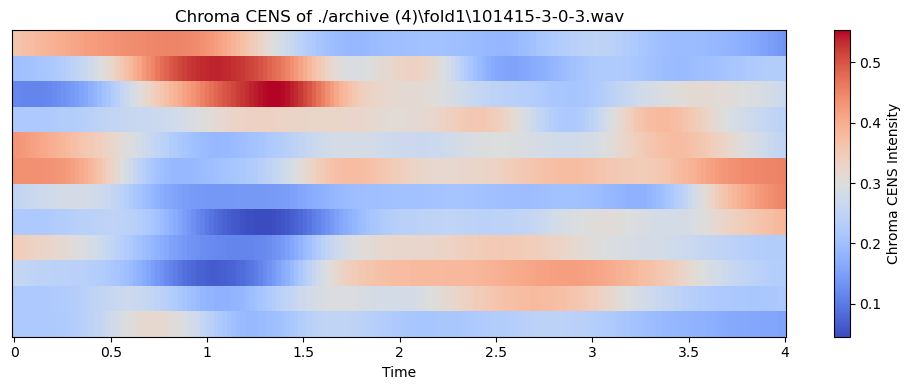

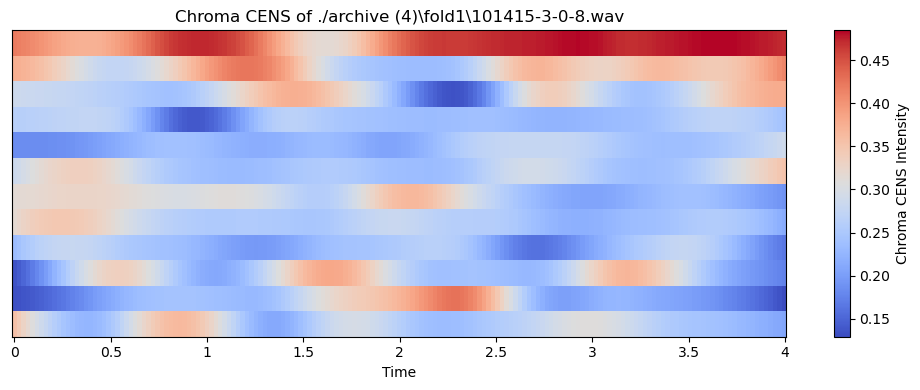

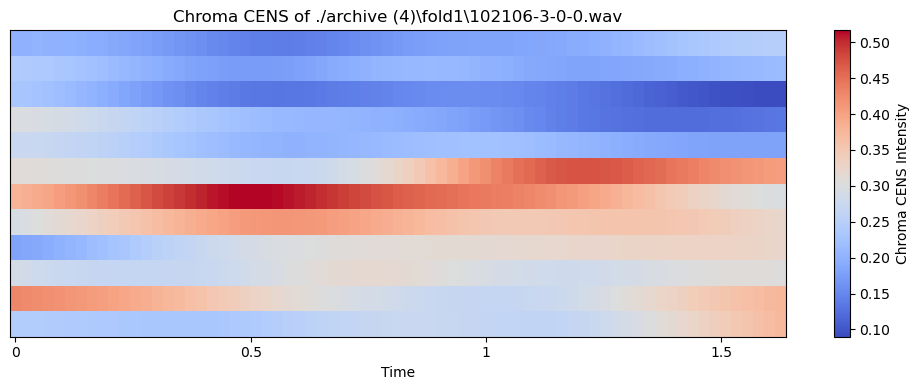

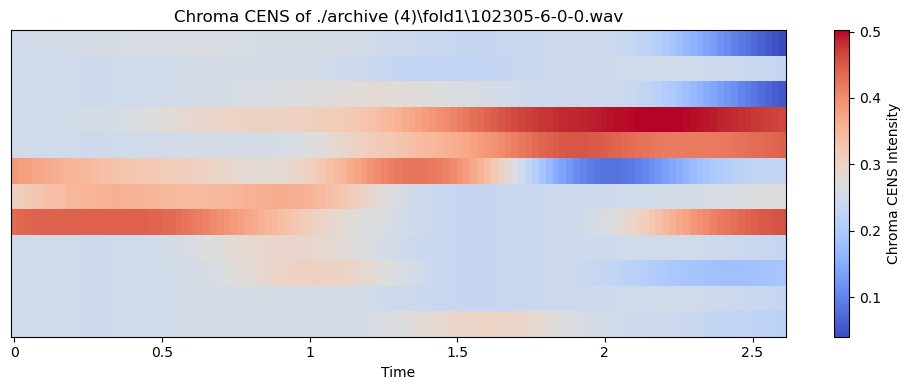

In [26]:
files = audio_files[:5]
for audio_file in files:
    # Load the audio file
    data, sr = librosa.load(audio_file)

    # Compute Chroma CENS
    chroma_cens = librosa.feature.chroma_cens(y=data, sr=sr)

    # Plot Chroma CENS
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma_cens, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar(label='Chroma CENS Intensity')
    plt.title(f'Chroma CENS of {audio_file}')
    plt.tight_layout()
    plt.show()

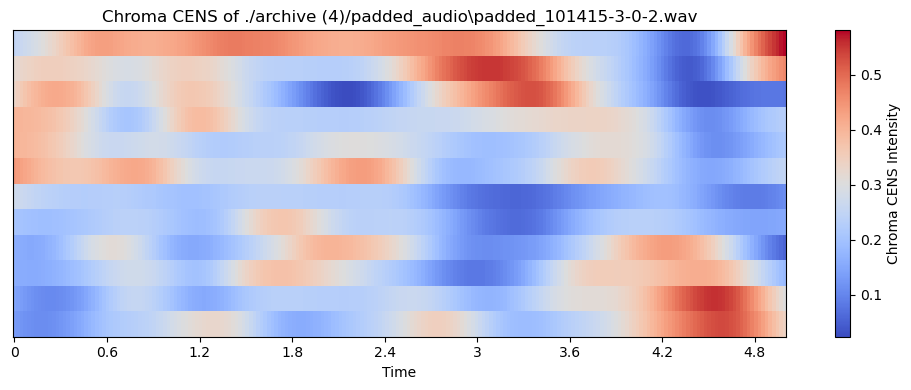

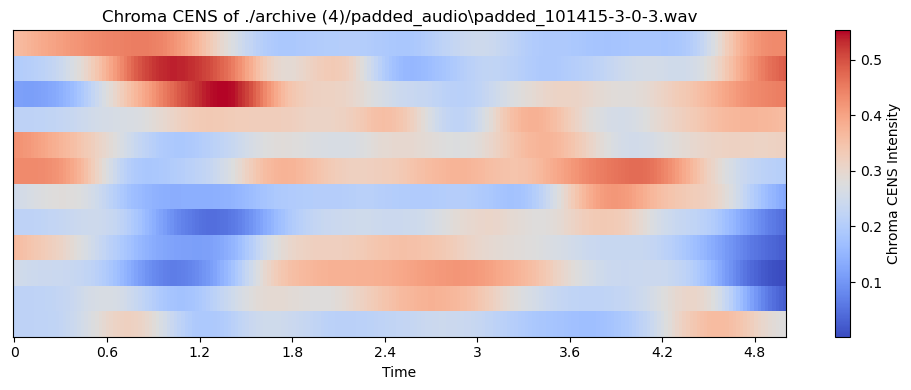

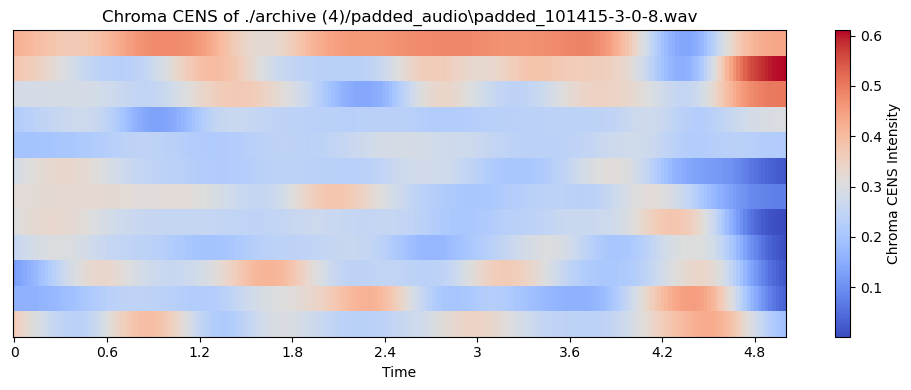

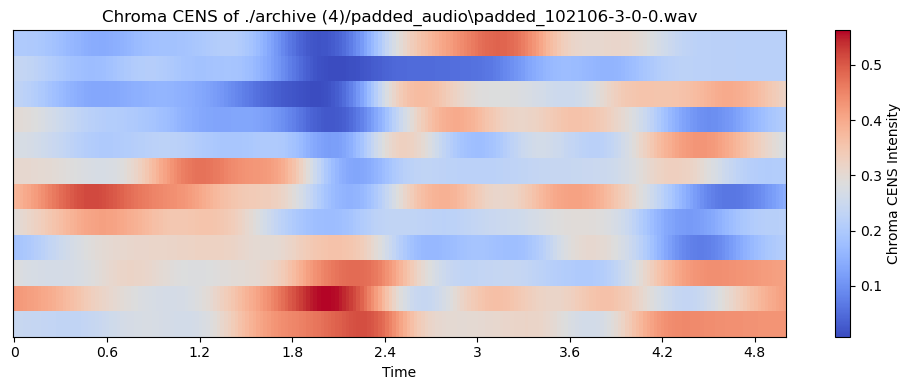

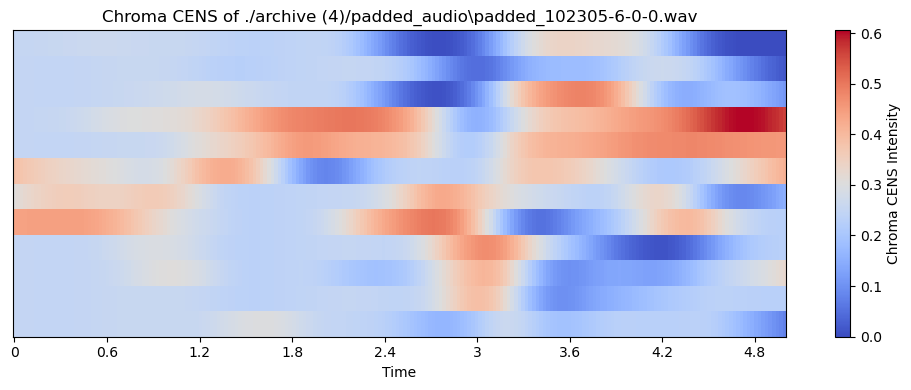

In [27]:
files = glob.glob(os.path.join(padded_audio_dir, "padded_*.wav"))[:5]
for audio_file in files:
    # Load the audio file
    data, sr = librosa.load(audio_file)

    # Compute Chroma CENS
    chroma_cens = librosa.feature.chroma_cens(y=data, sr=sr)

    # Plot Chroma CENS
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(chroma_cens, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar(label='Chroma CENS Intensity')
    plt.title(f'Chroma CENS of {audio_file}')
    plt.tight_layout()
    plt.show()
